# Analyzing Booking Trend in the Hospitality Industry 

## Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("booking.csv")

## Basic Data Inspection

In [3]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.shape

(36285, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [6]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [7]:
df['booking status'].value_counts()

Not_Canceled    24396
Canceled        11889
Name: booking status, dtype: int64

In [8]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Remove Irrelevant Features

In [9]:
df.drop("Booking_ID", axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [11]:
# Data Cleaning
df.duplicated().sum()

10276

In [12]:
# confirm lenth of our data before removing duplicate
len(df)

36285

In [13]:
# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
# re-confirm length of our data after removing duplicate
len(df)

26009

## Exploratory Data Analysis

### Univariate Analysis (Numerical)

Most numerical columns are either binary or categorical, except for lead time and average price. The statistical summary also suggested a big outlier, which will be confirmed and addressed using boxplot and IQRB

### Lead Time and Average Price Analysis

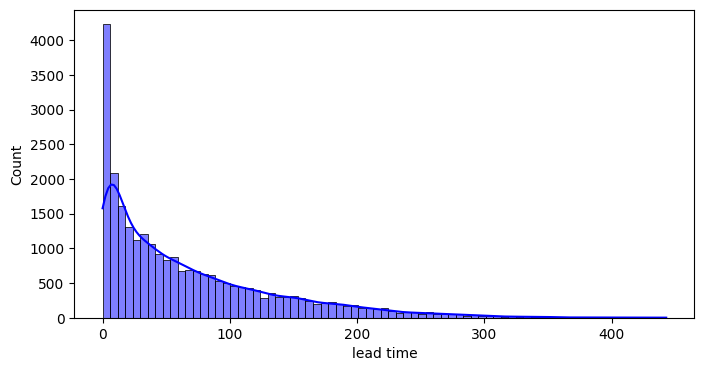

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(df["lead time"], color="blue", kde=True)
plt.show()

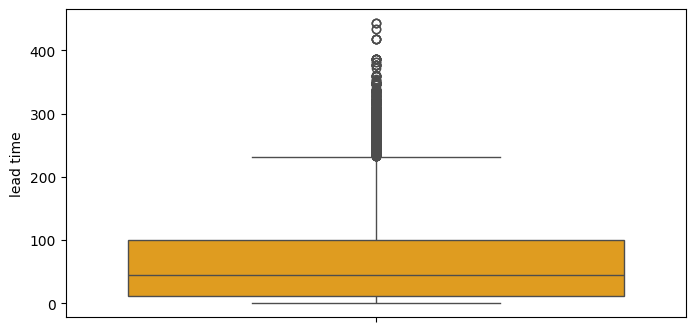

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(df["lead time"], color="orange")
plt.show()

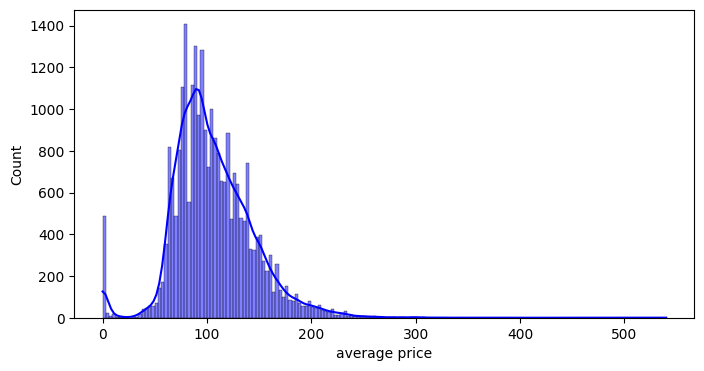

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df["average price"], color="blue", kde=True)
plt.show()

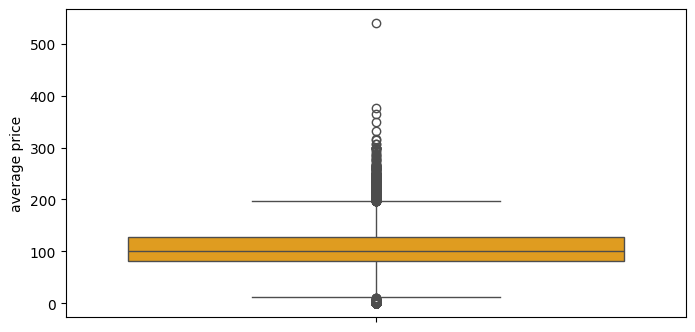

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(df["average price"], color="orange")
plt.show()

In [19]:
numerical_columns = df.select_dtypes(include="number").columns

In [20]:
len(numerical_columns)

11

### Lets handle outliers using IQR

Most numerical columns are either binary or categorical, except for lead time and average price

In [21]:
l1 = df[["lead time"]].quantile(0.25)
l3 = df[["lead time"]].quantile(0.75)

a1 = df[["average price"]].quantile(0.25)
a3 = df[["average price"]].quantile(0.75)

In [22]:
ilr = l3 - l1

iar = a3 -a1

In [23]:
lower_bound_lead_time = l1 - 1.5 * ilr
upper_bound_lead_time = l3 + 1.5 * ilr

lower_bound_average_price = a1 - 1.5 * iar
upper_bound_average_price = a3 + 1.5 * iar

In [24]:
df[["lead time"]] = df[["lead time"]].clip(lower_bound_lead_time, upper_bound_lead_time, axis=1)

df[["average price"]] = df[["average price"]].clip(lower_bound_average_price, upper_bound_average_price, axis=1)

### Lets visualize the boxplot again to verify if the outliers are gone

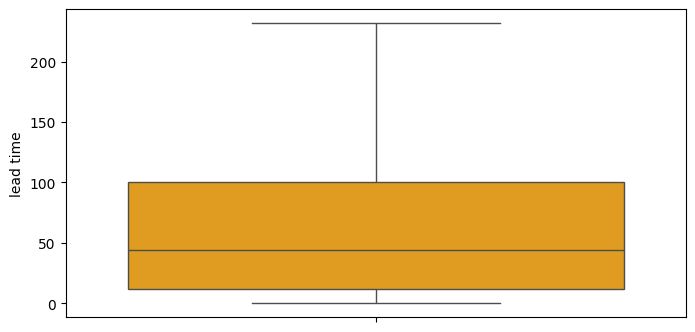

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(df["lead time"], color="orange")
plt.show()

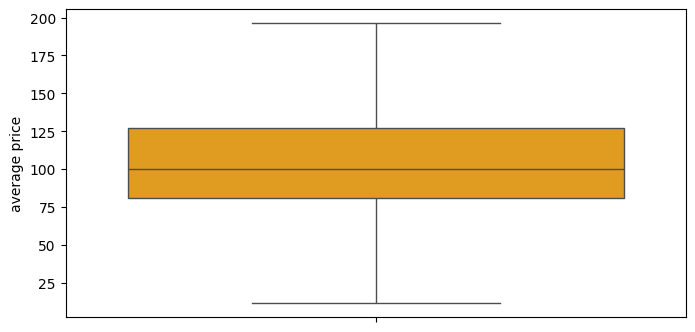

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(df["average price"], color="orange")
plt.show()

### Feature Engineering


In [27]:
# First, convert to datetime with errors='coerce' to handle invalid dates (leap year dates) in our dataset
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Drop rows with NaT values
df = df.dropna(subset=['date of reservation'])

# Create new time-based features
df['month_of_reservation'] = df['date of reservation'].dt.strftime('%b')   # e.g., Jan, Feb
df['day_of_week'] = df['date of reservation'].dt.day_name()                # e.g., Monday
df['reservation_month'] = df['date of reservation'].dt.month               # numeric month
df['reservation_weekday'] = df['date of reservation'].dt.weekday           # numeric day (0=Monday)

# Sort by date (good for time series or plots)
df.sort_values(by='date of reservation', inplace=True)


In [28]:
df.head(2)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month_of_reservation,day_of_week,reservation_month,reservation_weekday
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,2015-10-02,Not_Canceled,Oct,Friday,10,4
5,1,0,0,2,Meal Plan 2,0,Room_Type 1,232,Offline,0,0,0,100.0,1,2016-09-13,Canceled,Sep,Tuesday,9,1


In [29]:
numerical_columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests'],
      dtype='object')

### Seasonal Trends

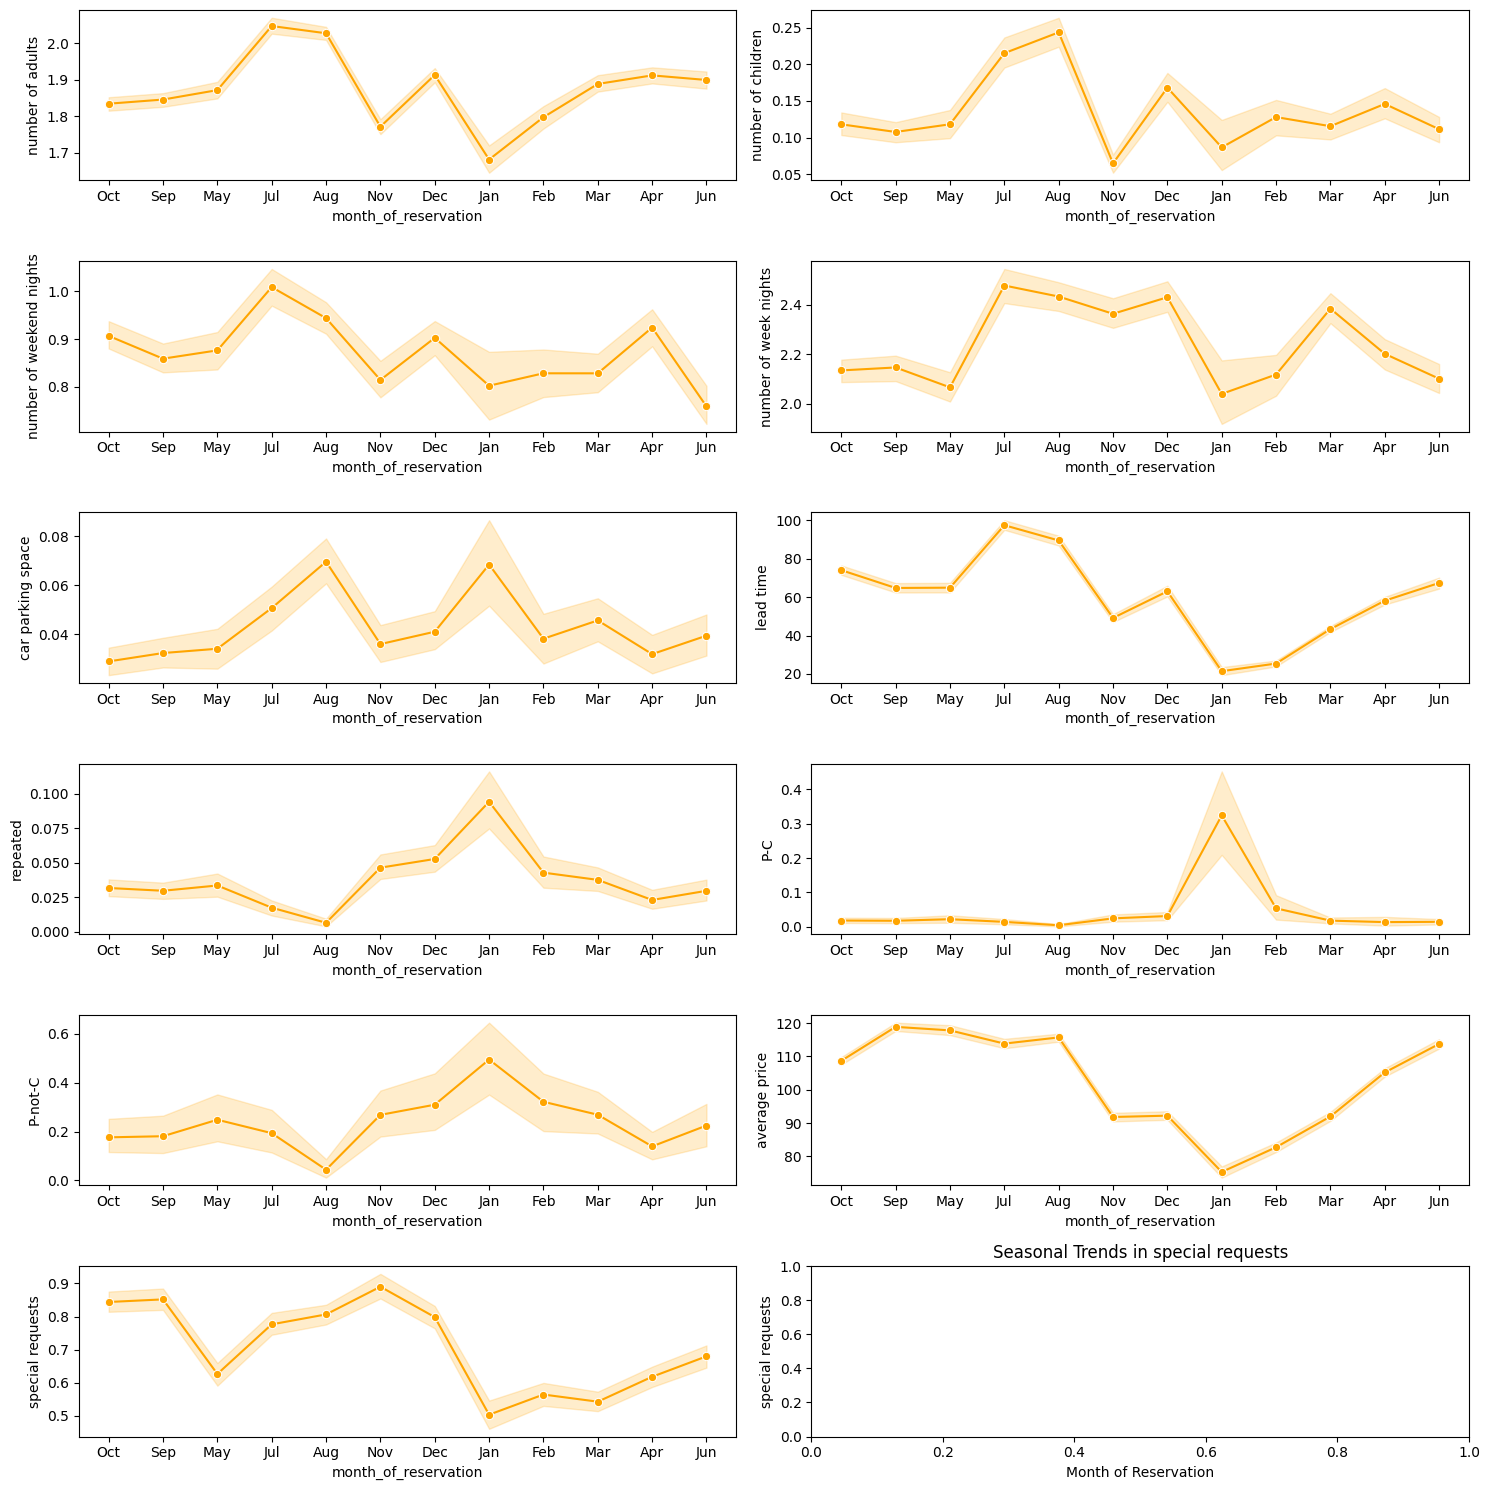

In [30]:
fig, position = plt.subplots(nrows=6, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.lineplot(x='month_of_reservation', y=column_name, data=df, marker='o', color='orange', ax=position[index])
    plt.title(f'Seasonal Trends in {column_name}')
    plt.xlabel('Month of Reservation')
    plt.ylabel(column_name)

plt.tight_layout()
plt.show()

#### Seasonal Trend Insights:

- Number of Adults: The number of adults per booking is relatively stable throughout the year, with a slight dip in December and a peak in the spring (March-April).
- Number of Children: The number of children follows a distinct seasonal pattern. There are peaks in the summer (July-August) and during the Christmas holiday season (December). This is expected as these are common times for family vacations.
- Number of Weekend Nights & Week Nights:Weekend Nights: The number of weekend and Week nights booked is generally higher in the spring and summer months (April to July), suggesting that people are more likely to take shorter trips during these periods. There's a notable dip in December.
- Lead Time: the time between booking and arrival, peaks in late spring (April-May) and early summer (June). This suggests that people are booking their summer vacations well in advance. There is a dip in the winter months, indicating more last-minute bookings during that period.


## Unvariate Analysis (Categorical Data)

In [31]:
categorical_columns = df.select_dtypes(include="object").columns

In [32]:
categorical_columns

Index(['type of meal', 'room type', 'market segment type', 'booking status',
       'month_of_reservation', 'day_of_week'],
      dtype='object')

In [33]:
len(categorical_columns)

6

In [34]:
categorical_data = df.select_dtypes(include="object")

In [35]:
categorical_data.head()

,type of meal,room type,market segment type,booking status,month_of_reservation,day_of_week
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled,Oct,Friday
5,Meal Plan 2,Room_Type 1,Offline,Canceled,Sep,Tuesday
3,Meal Plan 1,Room_Type 1,Online,Canceled,May,Saturday
556,Meal Plan 2,Room_Type 1,Offline,Not_Canceled,Jul,Saturday
656,Meal Plan 2,Room_Type 1,Online,Canceled,Jul,Saturday


In [36]:
numerical_data = df.select_dtypes(exclude="object")

In [37]:
numerical_data.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation,reservation_month,reservation_weekday
0,1,1,2,5,0,224,0,0,0,88.0,0,2015-10-02,10,4
5,1,0,0,2,0,232,0,0,0,100.0,1,2016-09-13,9,1
3,1,0,0,2,0,211,0,0,0,100.0,1,2017-05-20,5,5
556,1,0,0,2,0,232,0,0,0,80.0,0,2017-07-01,7,5
656,2,0,0,2,0,232,0,0,0,101.5,0,2017-07-01,7,5


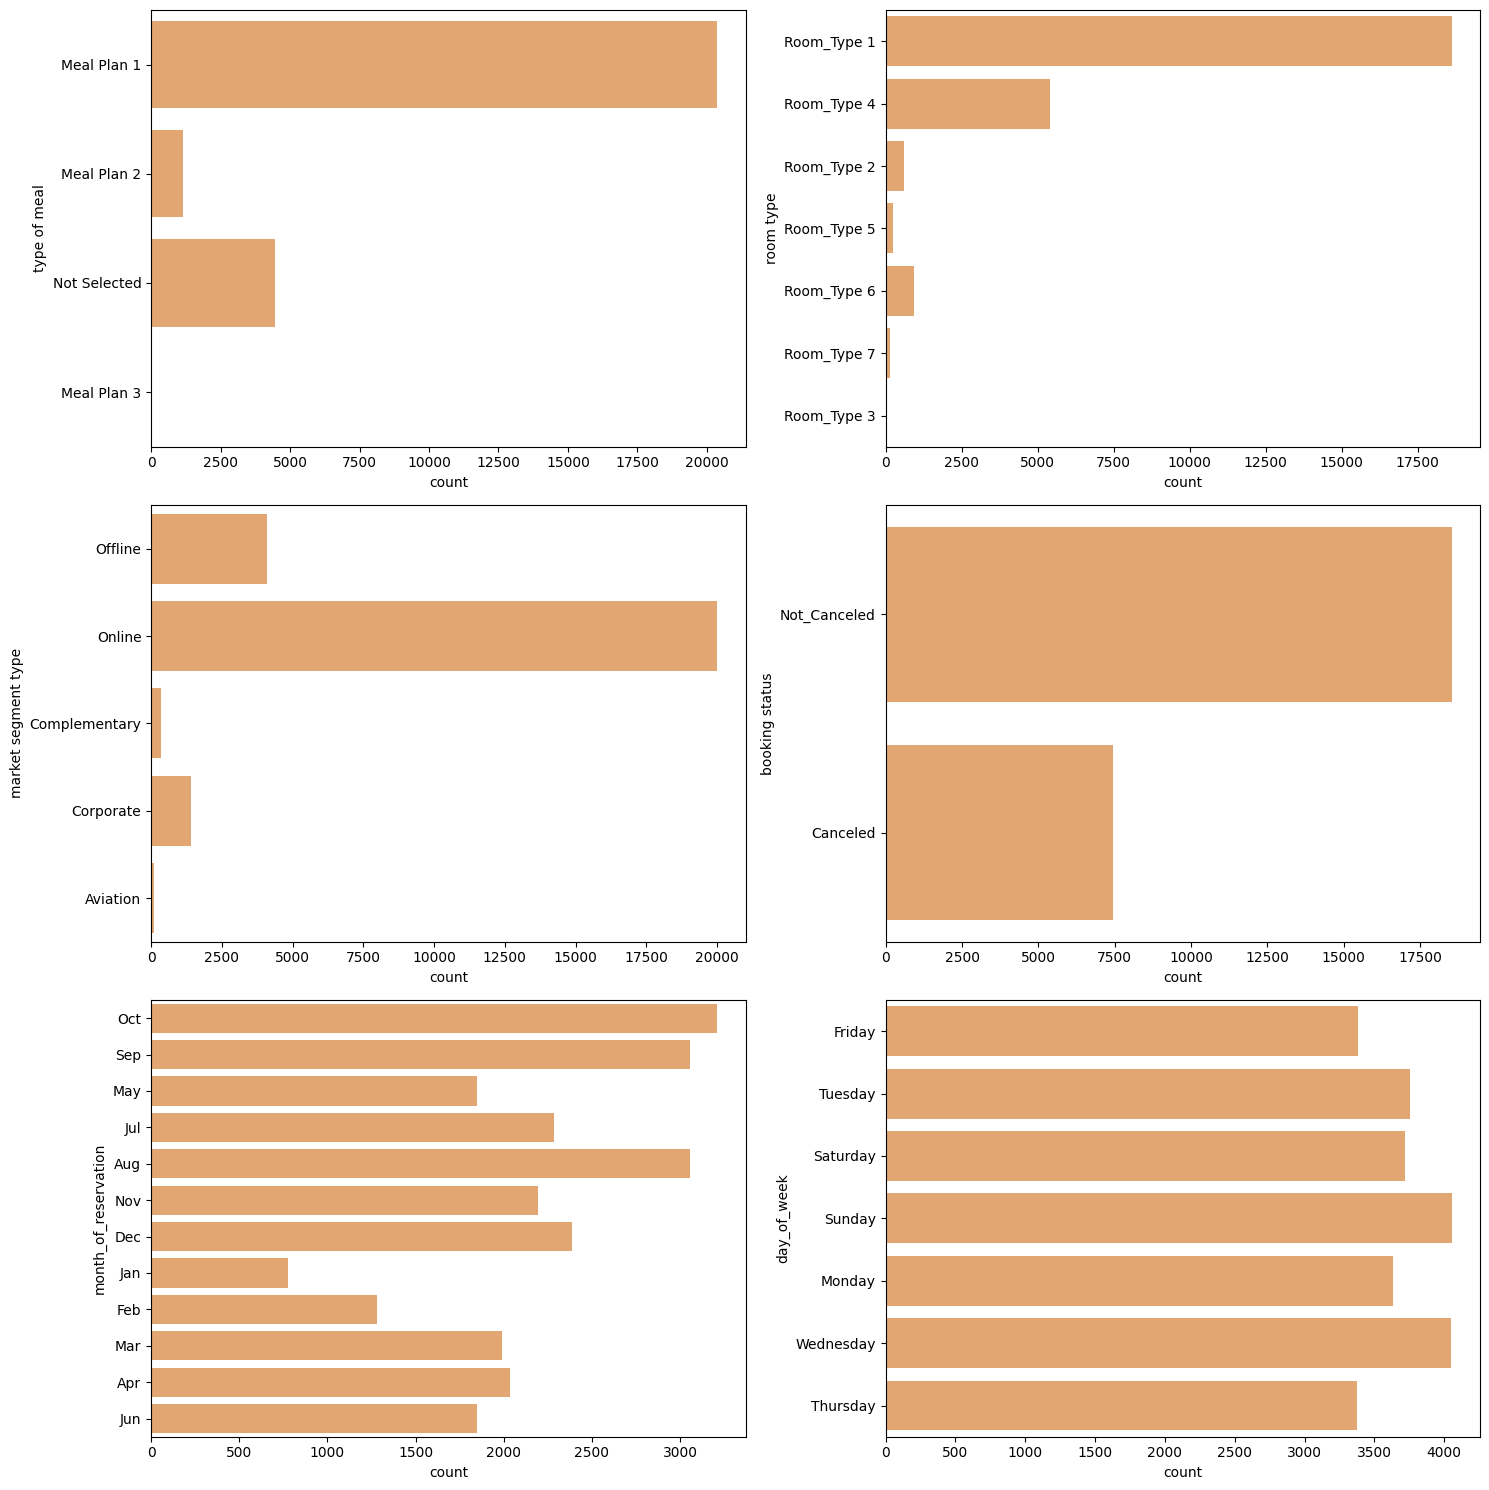

In [38]:
fig, position = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(categorical_columns):
    sns.countplot(df[column_name], color="sandybrown", ax=position[index])

plt.tight_layout()
plt.show()

## Insights from Categorical data
### Type of Meal Plan:
- The most popular meal plan is "Meal Plan 1," with a very high count, suggesting it's the standard or most frequently selected option.
- "Not Selected" also has a significant count, indicating that many bookings are made without a specific meal plan choice, or perhaps the meal plan is chosen later.
### Room Type:
- "Room Type 1" is by far the most booked room type. This could be the standard room type or the most numerous room type in the hotel.
- "Room Type 4" is the second most popular, but with a much lower count than "Room Type 1."
### Market Segment Type:
- The majority of bookings come from the "Online" market segment, highlighting the dominance of online travel agencies (OTAs) and direct online bookings.
- "Offline" bookings are the second most common, but with a significantly lower count than online bookings.
- "Corporate," "Complementary," and "Aviation" are very small segments, with "Aviation" being the least frequent.
### Booking Status:
- The number of "Canceled" bookings is substantial, but the number of "Not_Canceled" bookings is significantly higher. This indicates a majority of bookings are completed, but cancellations are a non-trivial factor for the business. The ratio of canceled to not-canceled bookings could be a key metric for further analysis.
### Month of Reservation:
- The month with the highest number of reservations is August, followed by July. This confirms the summer months are the peak booking season.
- There is also a peak in April and October.
- The number of reservations is lowest in the winter months, particularly in January, February, and November. This aligns with the seasonal trends observed in the previous analysis.
### Day of Arrival Week:
- The number of arrivals is fairly evenly distributed across the days of the week, with a slight peak on Sunday and Friday. This could indicate a mix of weekend leisure travelers (arriving Friday) and those starting their week-long stays (arriving Sunday).
- Monday and Thursday also have high counts, suggesting a consistent flow of both business and leisure travelers throughout the week. The data doesn't show a strong preference for any specific day, which suggests a diverse customer base.


## Bivariate Analysis

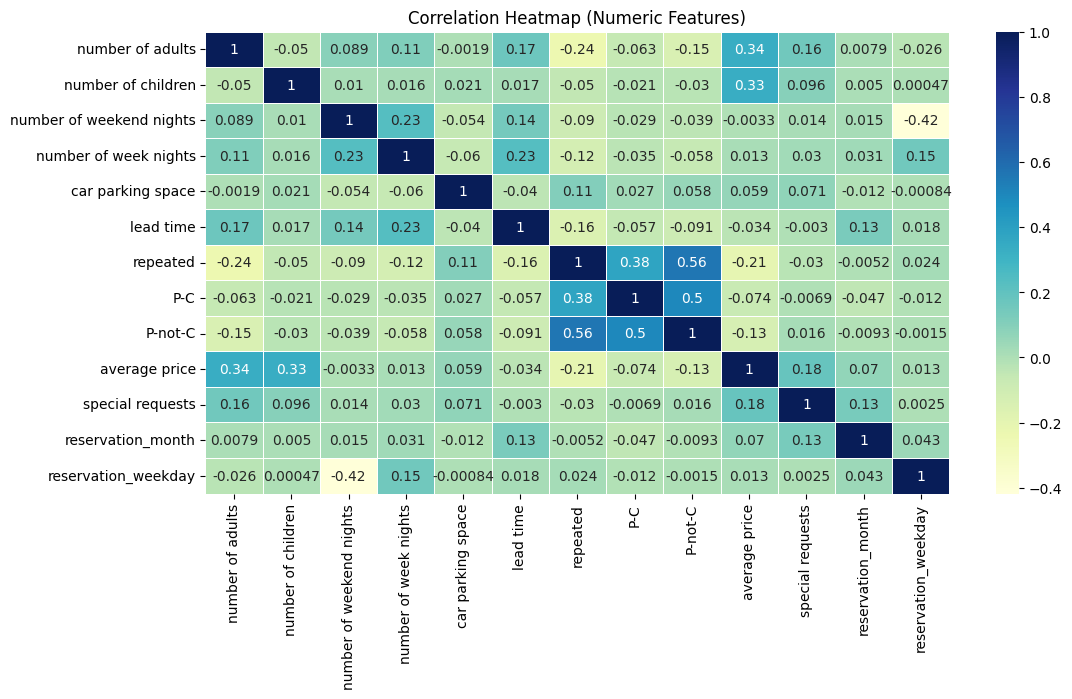

In [39]:
# 6. Correlation Heatmap (Numericals)

# Define numerical columns
numerical_columns = [
    'number of adults', 'number of children', 'number of weekend nights',
    'number of week nights', 'lead time', 'average price',
    'special requests', 'car parking space', 'P-C', 'P-not-C', 'repeated'
]


plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

### Insights from heatmap:
- Customer Behavior: The correlations highlight different customer segments. Families with children tend to book longer stays. Repeat guests are more likely to have a history of both successful bookings and cancellations.
- Pricing: The number of adults is the strongest predictor of average price among these variables, suggesting a direct relationship between party size and revenue.
- Data Nuances: The heatmap reveals some counter-intuitive relationships, such as the strong negative correlation between reservation weekday and month, which warrants further investigation. The weak correlation between lead time and average price also suggests that pricing strategies are not solely based on how far in advance a booking is made.
- Cancellations: The strong correlation between repeated guests and previous cancellations/not-cancellations suggests that cancellation behavior is a recurring trait among a specific group of customers.
- Car parking space: There is weak or no correlation between parking and other variables.
- Number of Adults & Average Price (0.34): This is a moderately strong positive correlation. It suggests that as the number of adults in a booking increases, the average price (ADR) also tends to increase. This is logical, as more people in a room often means a more expensive room or multiple rooms.
- Number of Children & Number of Week Nights (0.23): There is a moderate positive correlation here. This suggests that families with children tend to book longer stays (more weeknights) than other guests. This is consistent with the idea of families taking longer vacations.
- Number of Week Nights & Number of Weekend Nights (0.23): This is a moderate positive correlation. It indicates that people who book more weeknights are also likely to book more weekend nights, implying a tendency for longer overall stays.
- Special Requests & Number of Adults (0.16): This is a weak positive correlation, but it still indicates that bookings with more adults are slightly more likely to have special requests. This could be due to larger groups having more specific needs.
- Reservation Weekday & Reservation Month (-0.42): This is a strong negative correlation. This is a very interesting and unexpected finding. It could be an artifact of how the data is structured (e.g., specific weekdays are more common in certain months due to how a calendar falls), but it's more likely that there is a strong seasonal trend in when certain days are booked. For instance, weekend bookings might be heavily concentrated in summer months.


## Bivariate Analysis (Numerical vs Categorical)

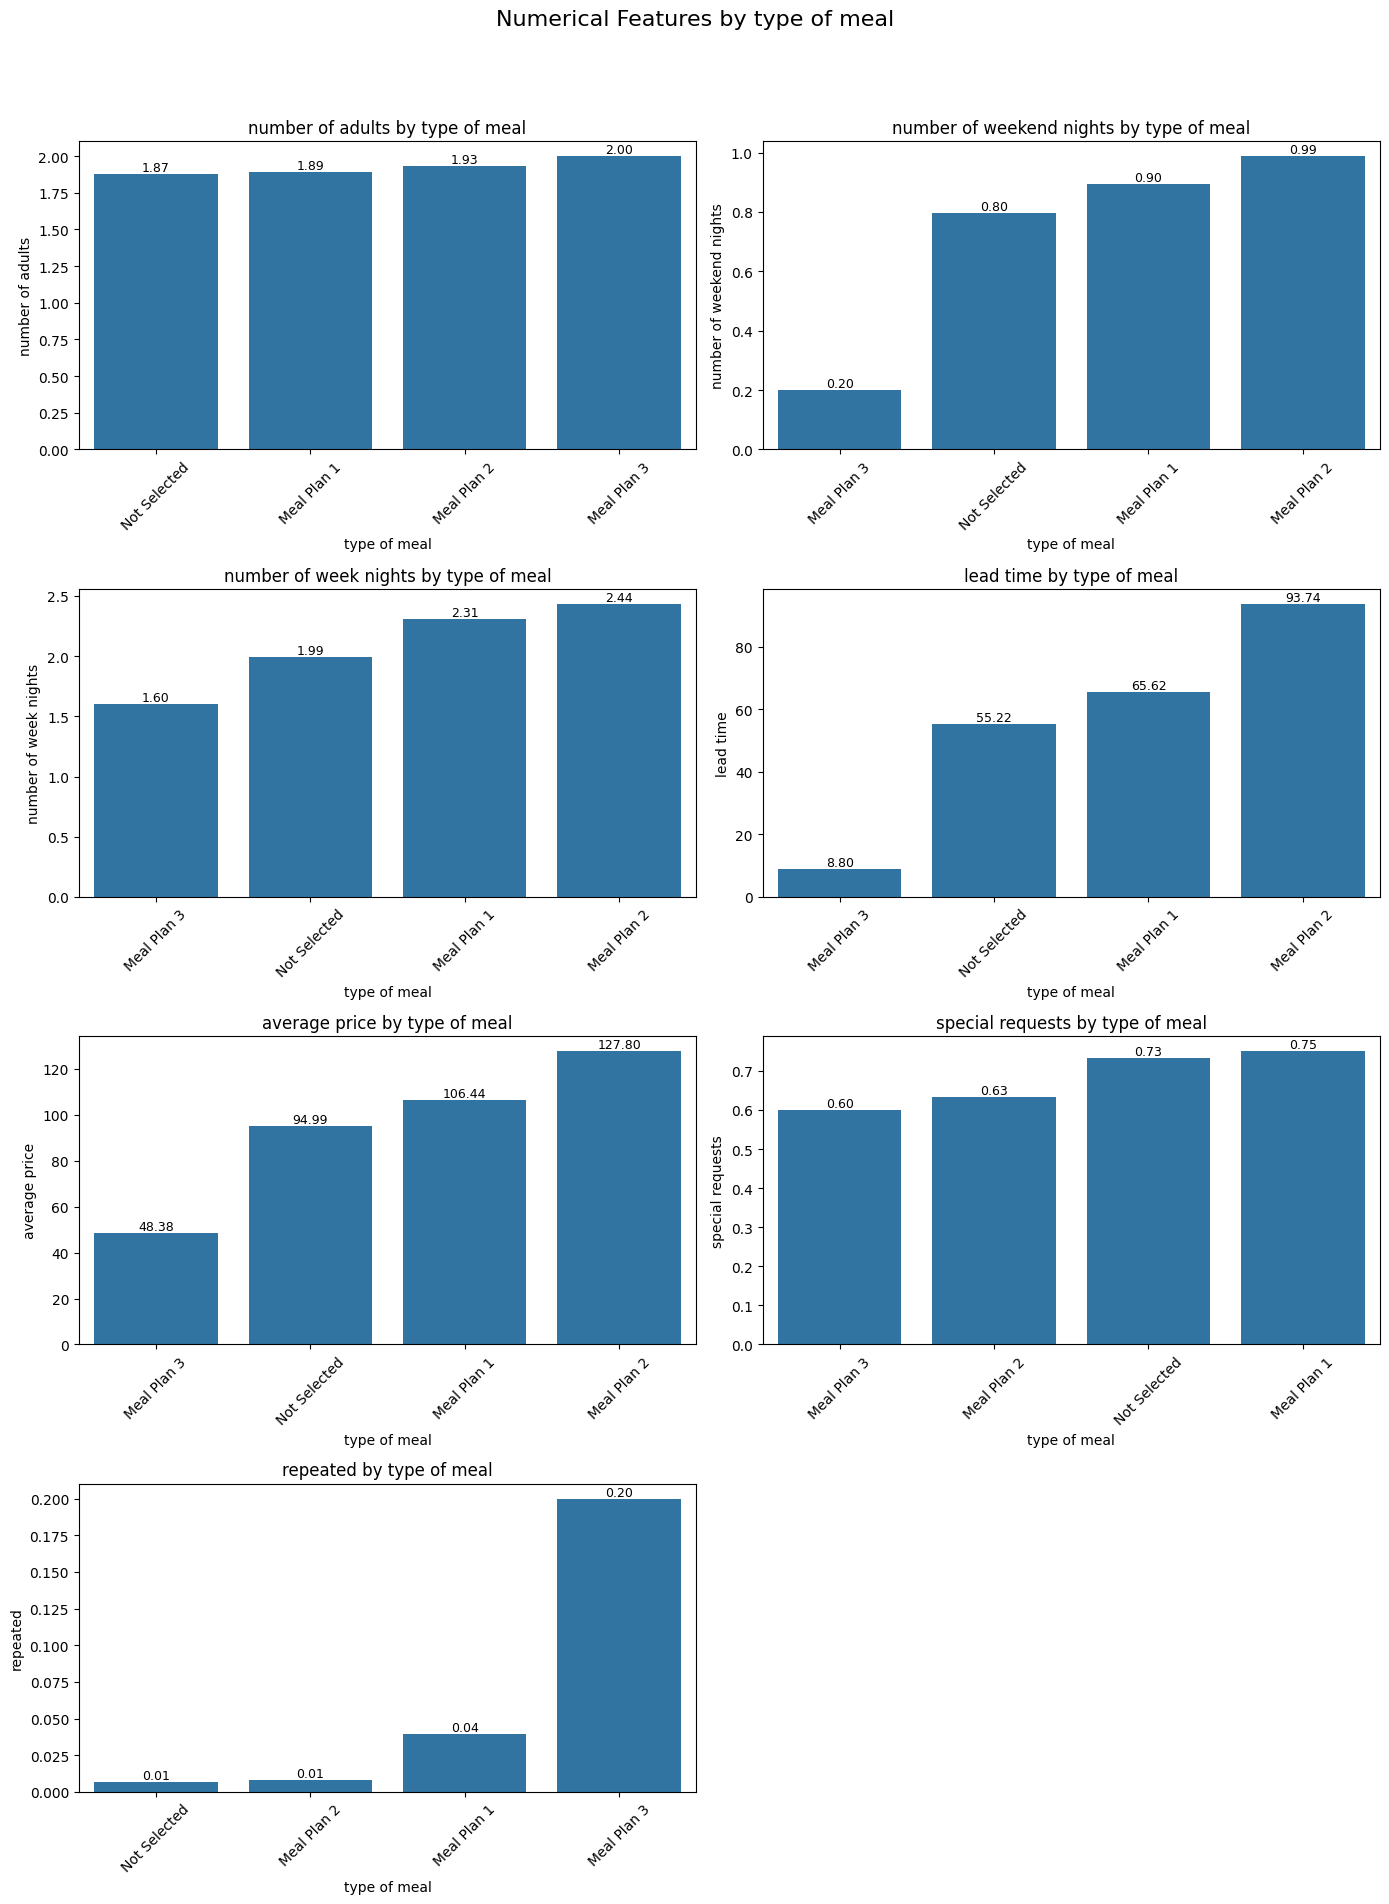

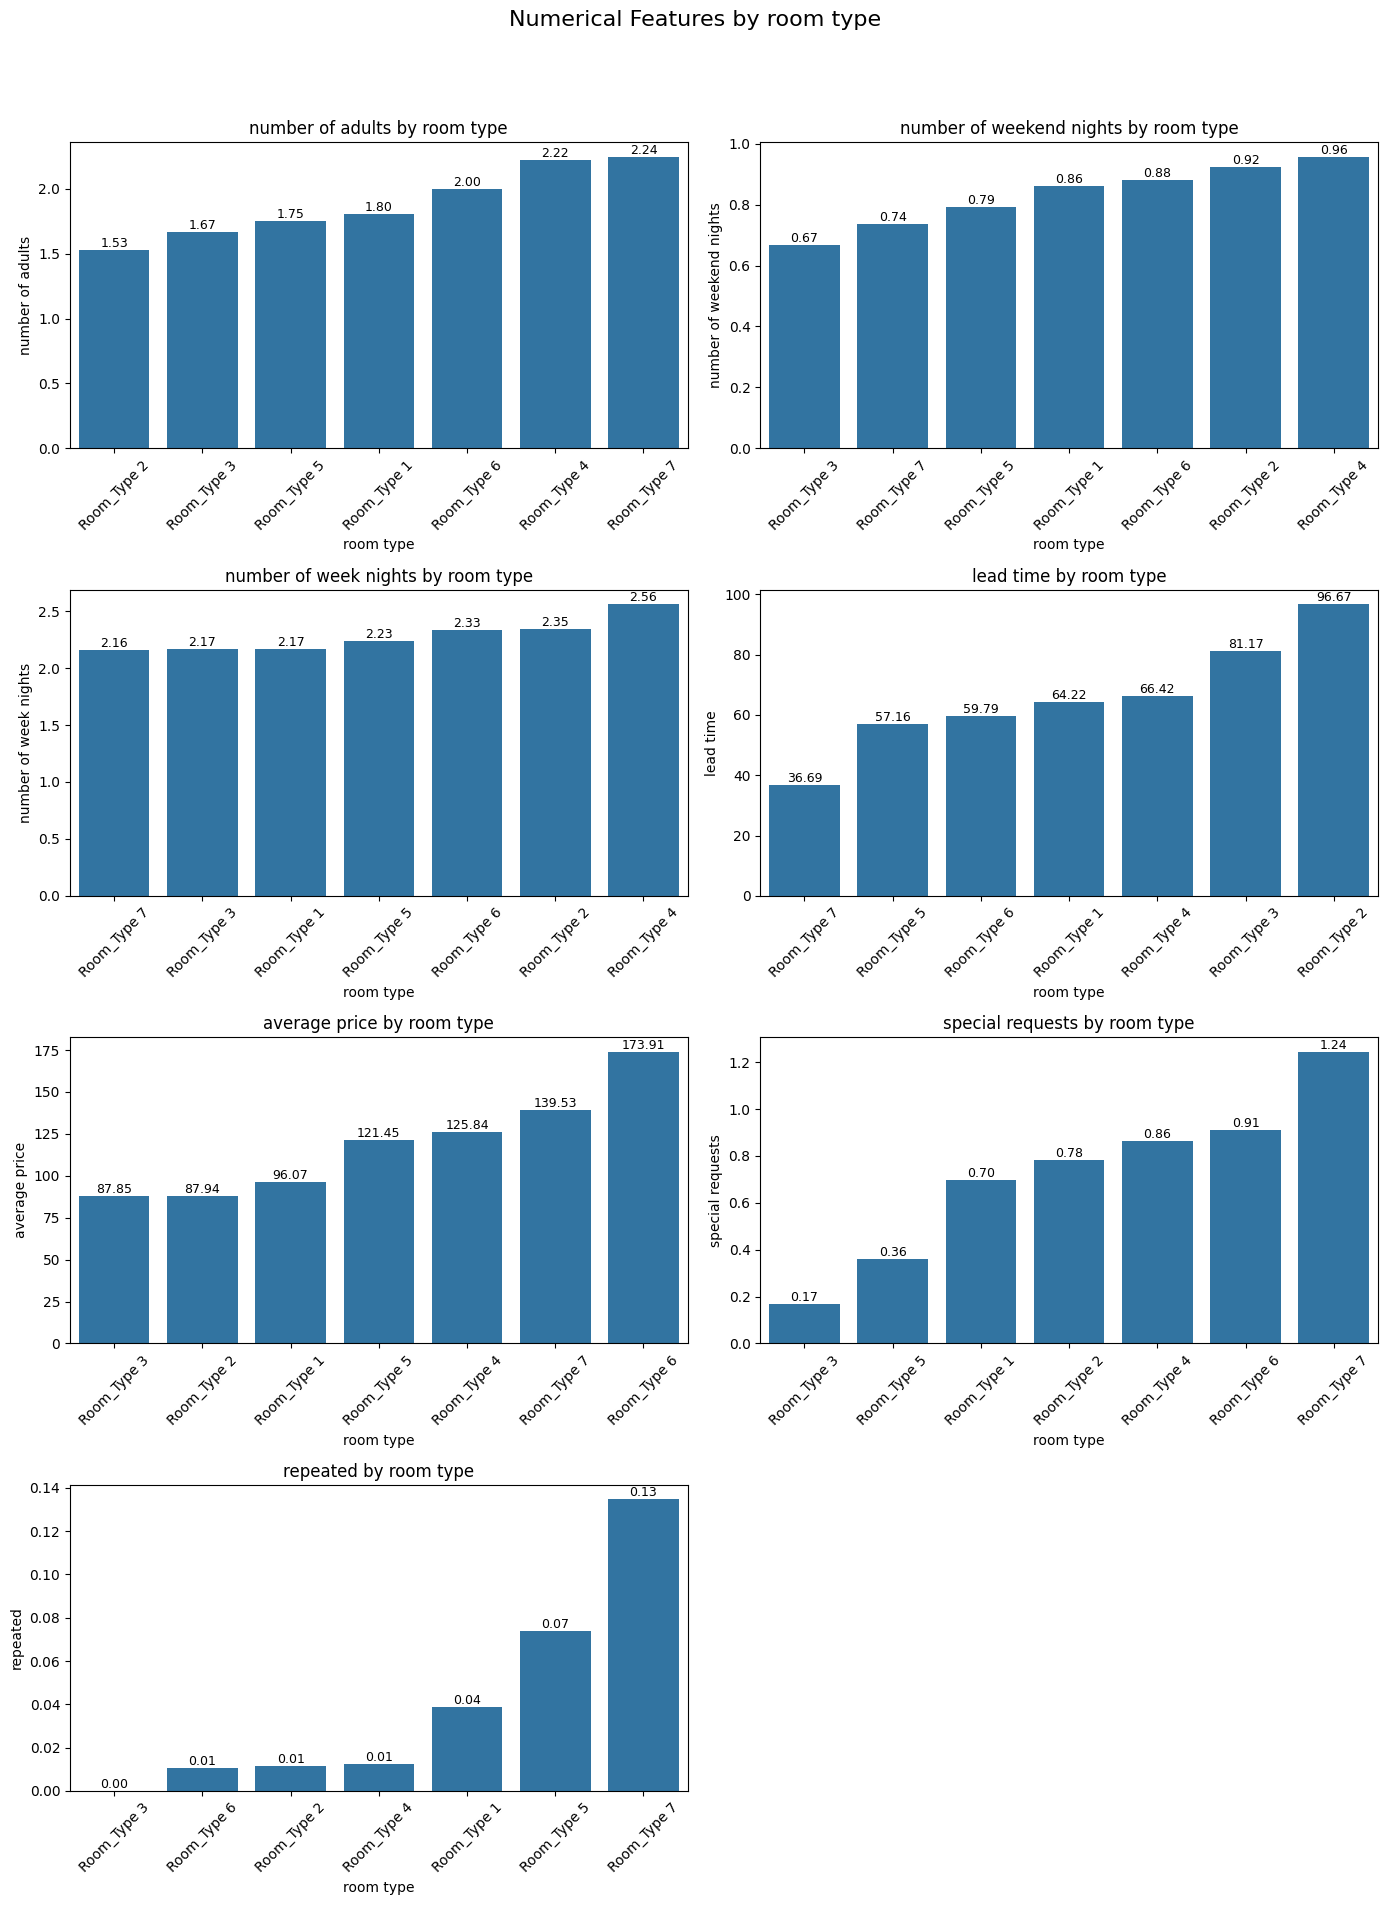

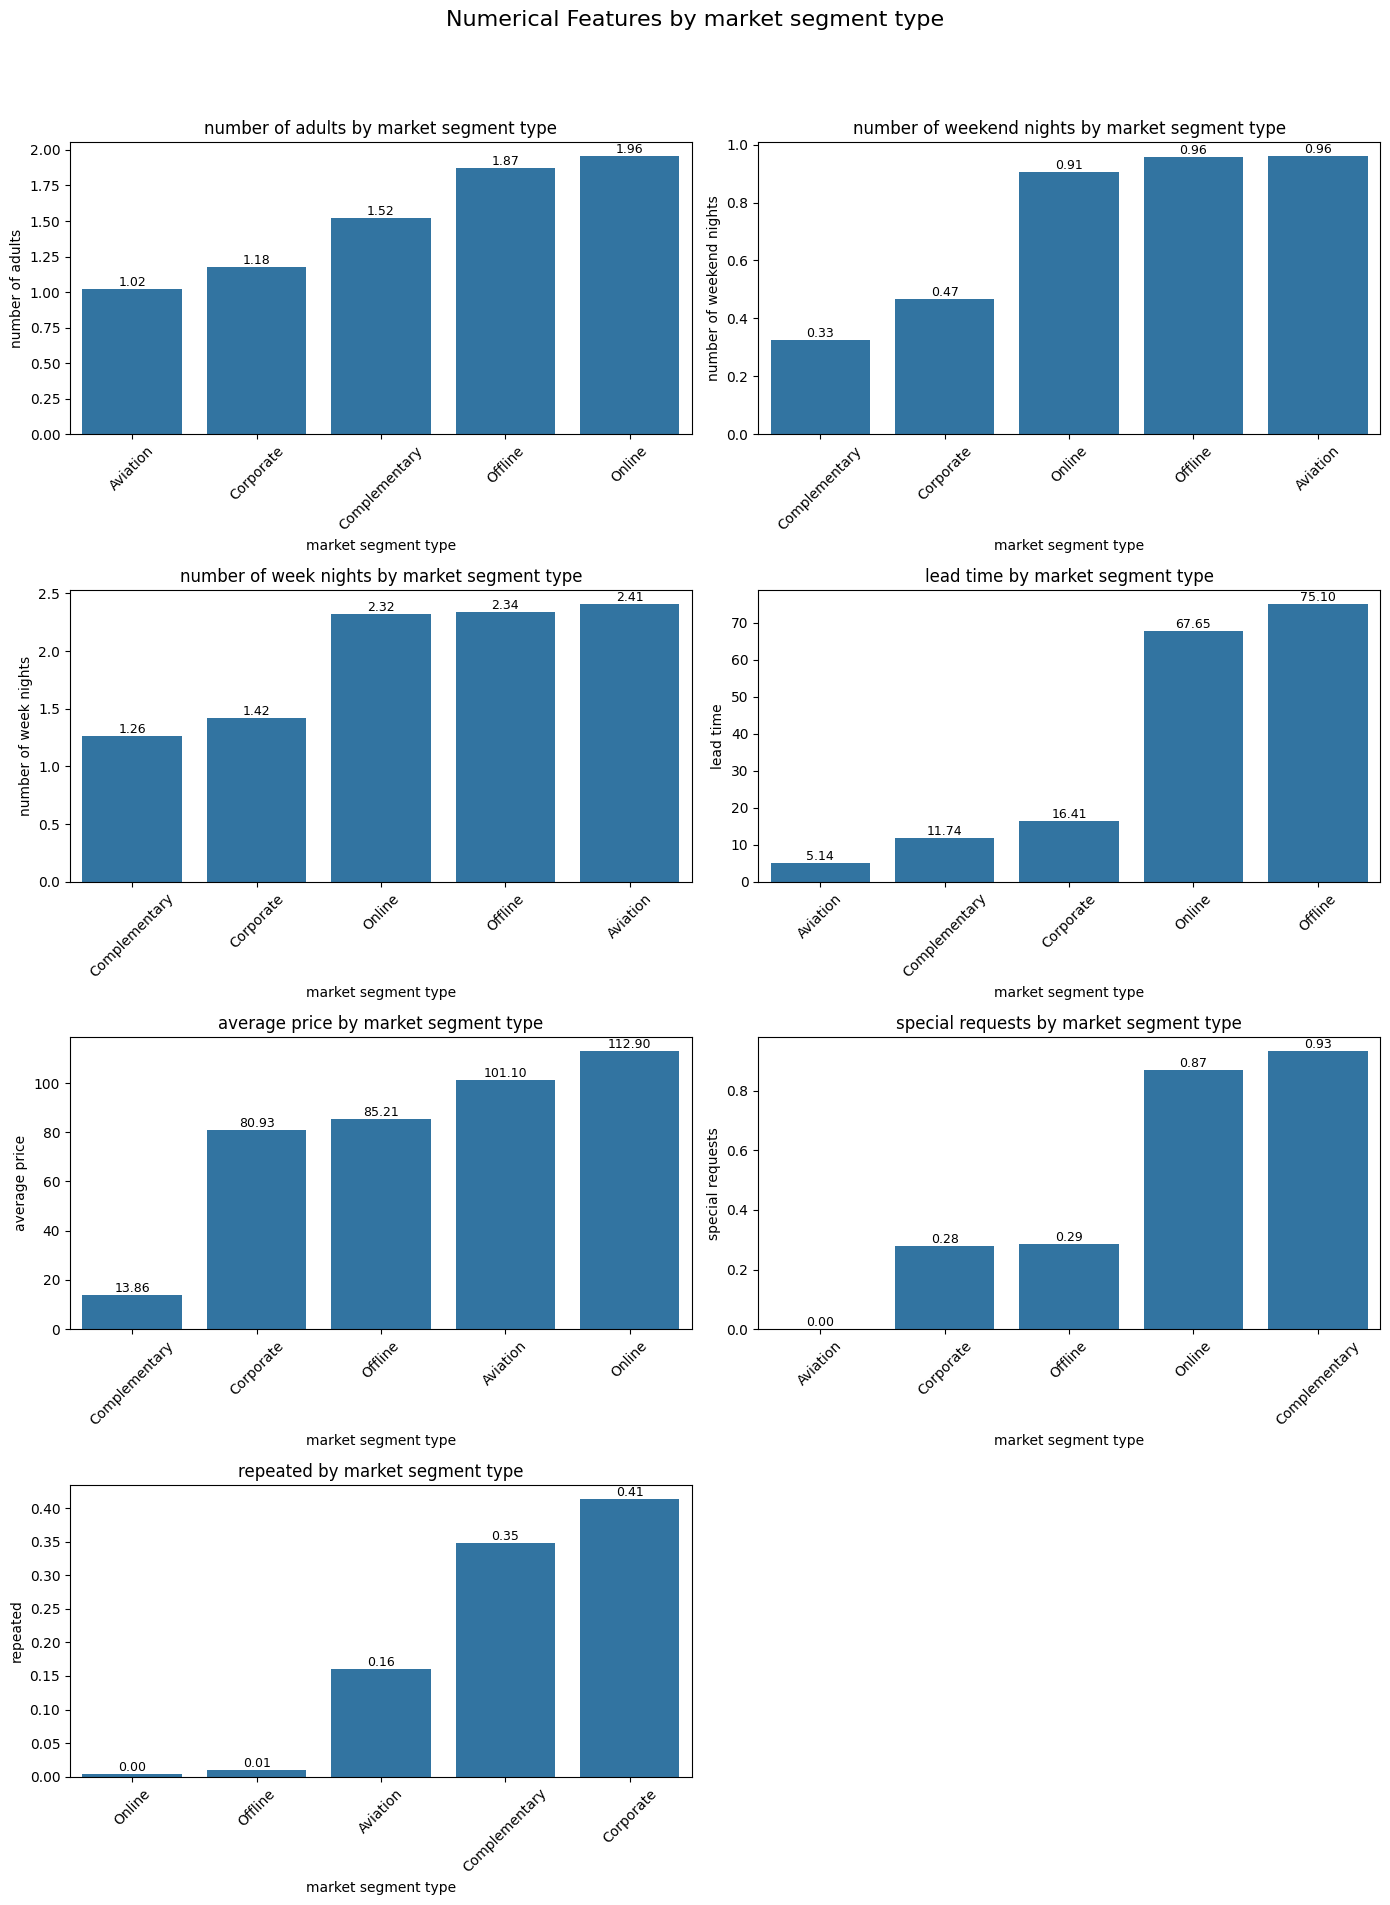

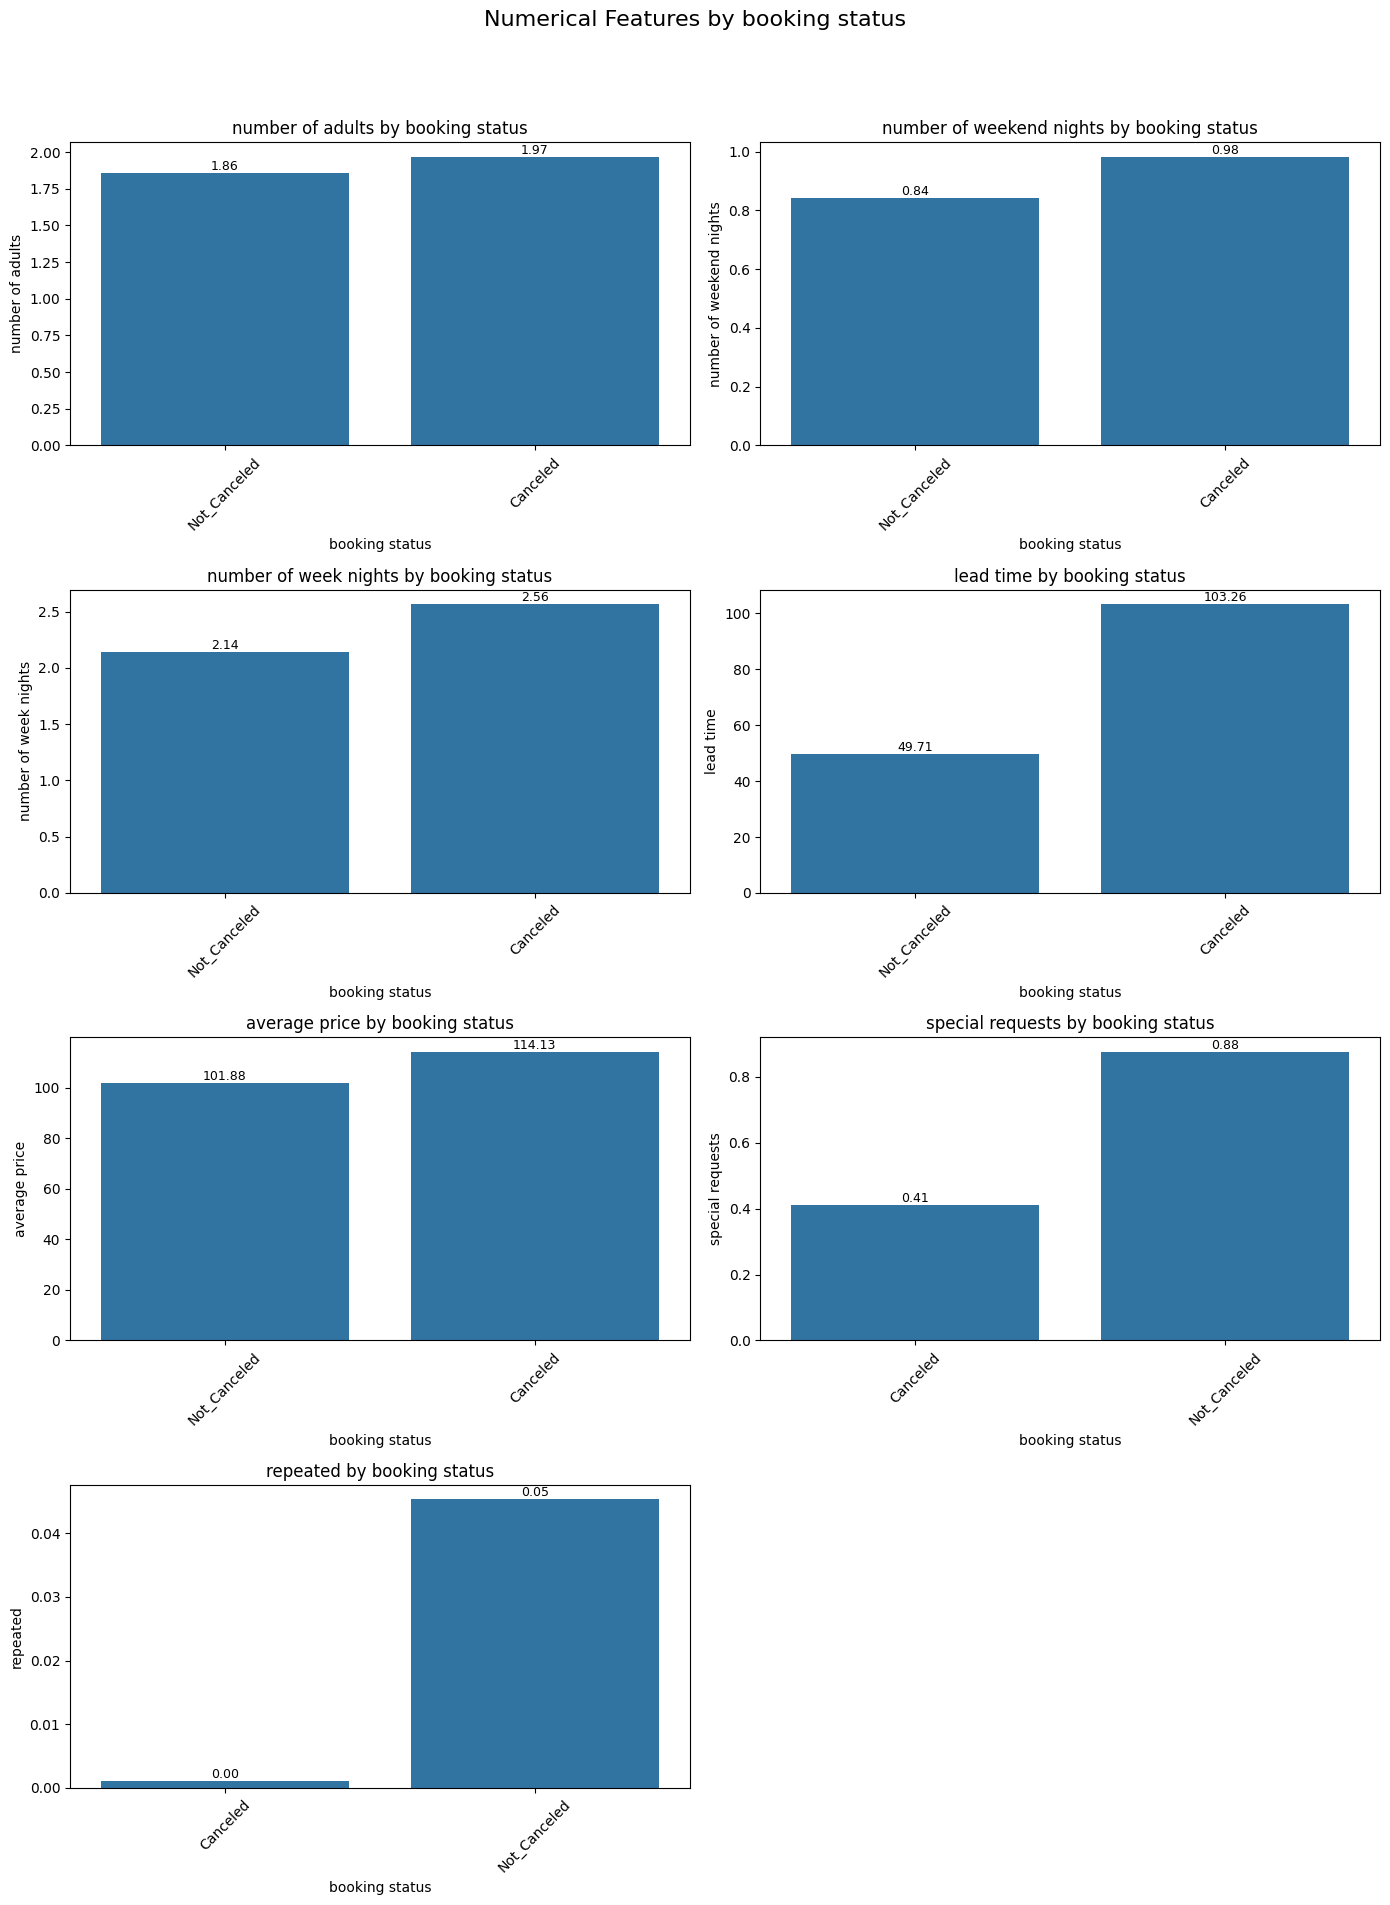

In [40]:
# Define categorical and numerical targets
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = [
    'number of adults', 'number of weekend nights', 'number of week nights',
    'lead time', 'average price', 'special requests', 'repeated'
]

categorical_columns = ['type of meal', 'room type', 'market segment type', 'booking status']

# Plotting in rows of 2
for cat in categorical_columns:
    num_plots = len(numerical_columns)
    rows = (num_plots + 1) // 2  # Ensures 2 plots per row
    fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))
    fig.suptitle(f"Numerical Features by {cat}", fontsize=16)

    for i, num in enumerate(numerical_columns):
        row, col = divmod(i, 2)
        ax = axes[row][col] if rows > 1 else axes[col]

        # Compute mean values and sort
        sorted_data = df.groupby(cat)[num].mean().sort_values().reset_index()

        # Plot sorted barplot
        sns.barplot(data=sorted_data, x=cat, y=num, ax=ax)
        ax.set_title(f"{num} by {cat}")
        ax.tick_params(axis='x', rotation=45)

        # Add value labels
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black')

    # Hide any unused subplots
    if num_plots % 2 != 0:
        axes[-1][-1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()




### Insights from Bivariate Analysis

- Overall Meal Plan Insights: "Meal Plan 2" appears to be the premium offering, attracting guests who plan ahead, stay longer, and are willing to pay more. "Meal Plan 3" targets last-minute, shorter, and budget-conscious travelers.
- Overall Room Type Insights: "Room Type 2" and "Room Type 4" appear to be premium offerings, attracting guests who book well in advance, stay longer, pay more, and have more special requests. This could be due to their size, amenities, or desirability.
- Overall Market Segment Insights: "Online" and "Offline" segments are dominant for leisure travel, characterized by longer lead times, higher prices, and more special requests. "Aviation" and "Complementary" represent distinct, often last-minute or discounted, booking patterns.
- Overall Booking Status Insights: The most prominent factors associated with canceled bookings are longer lead times, higher average prices, and a greater number of special requests. This suggests that guests who plan far in advance, book more expensive stays, or have specific needs are at a higher risk of canceling. This information is crucial for cancellation prediction and revenue management.

## Multivariate Analysis

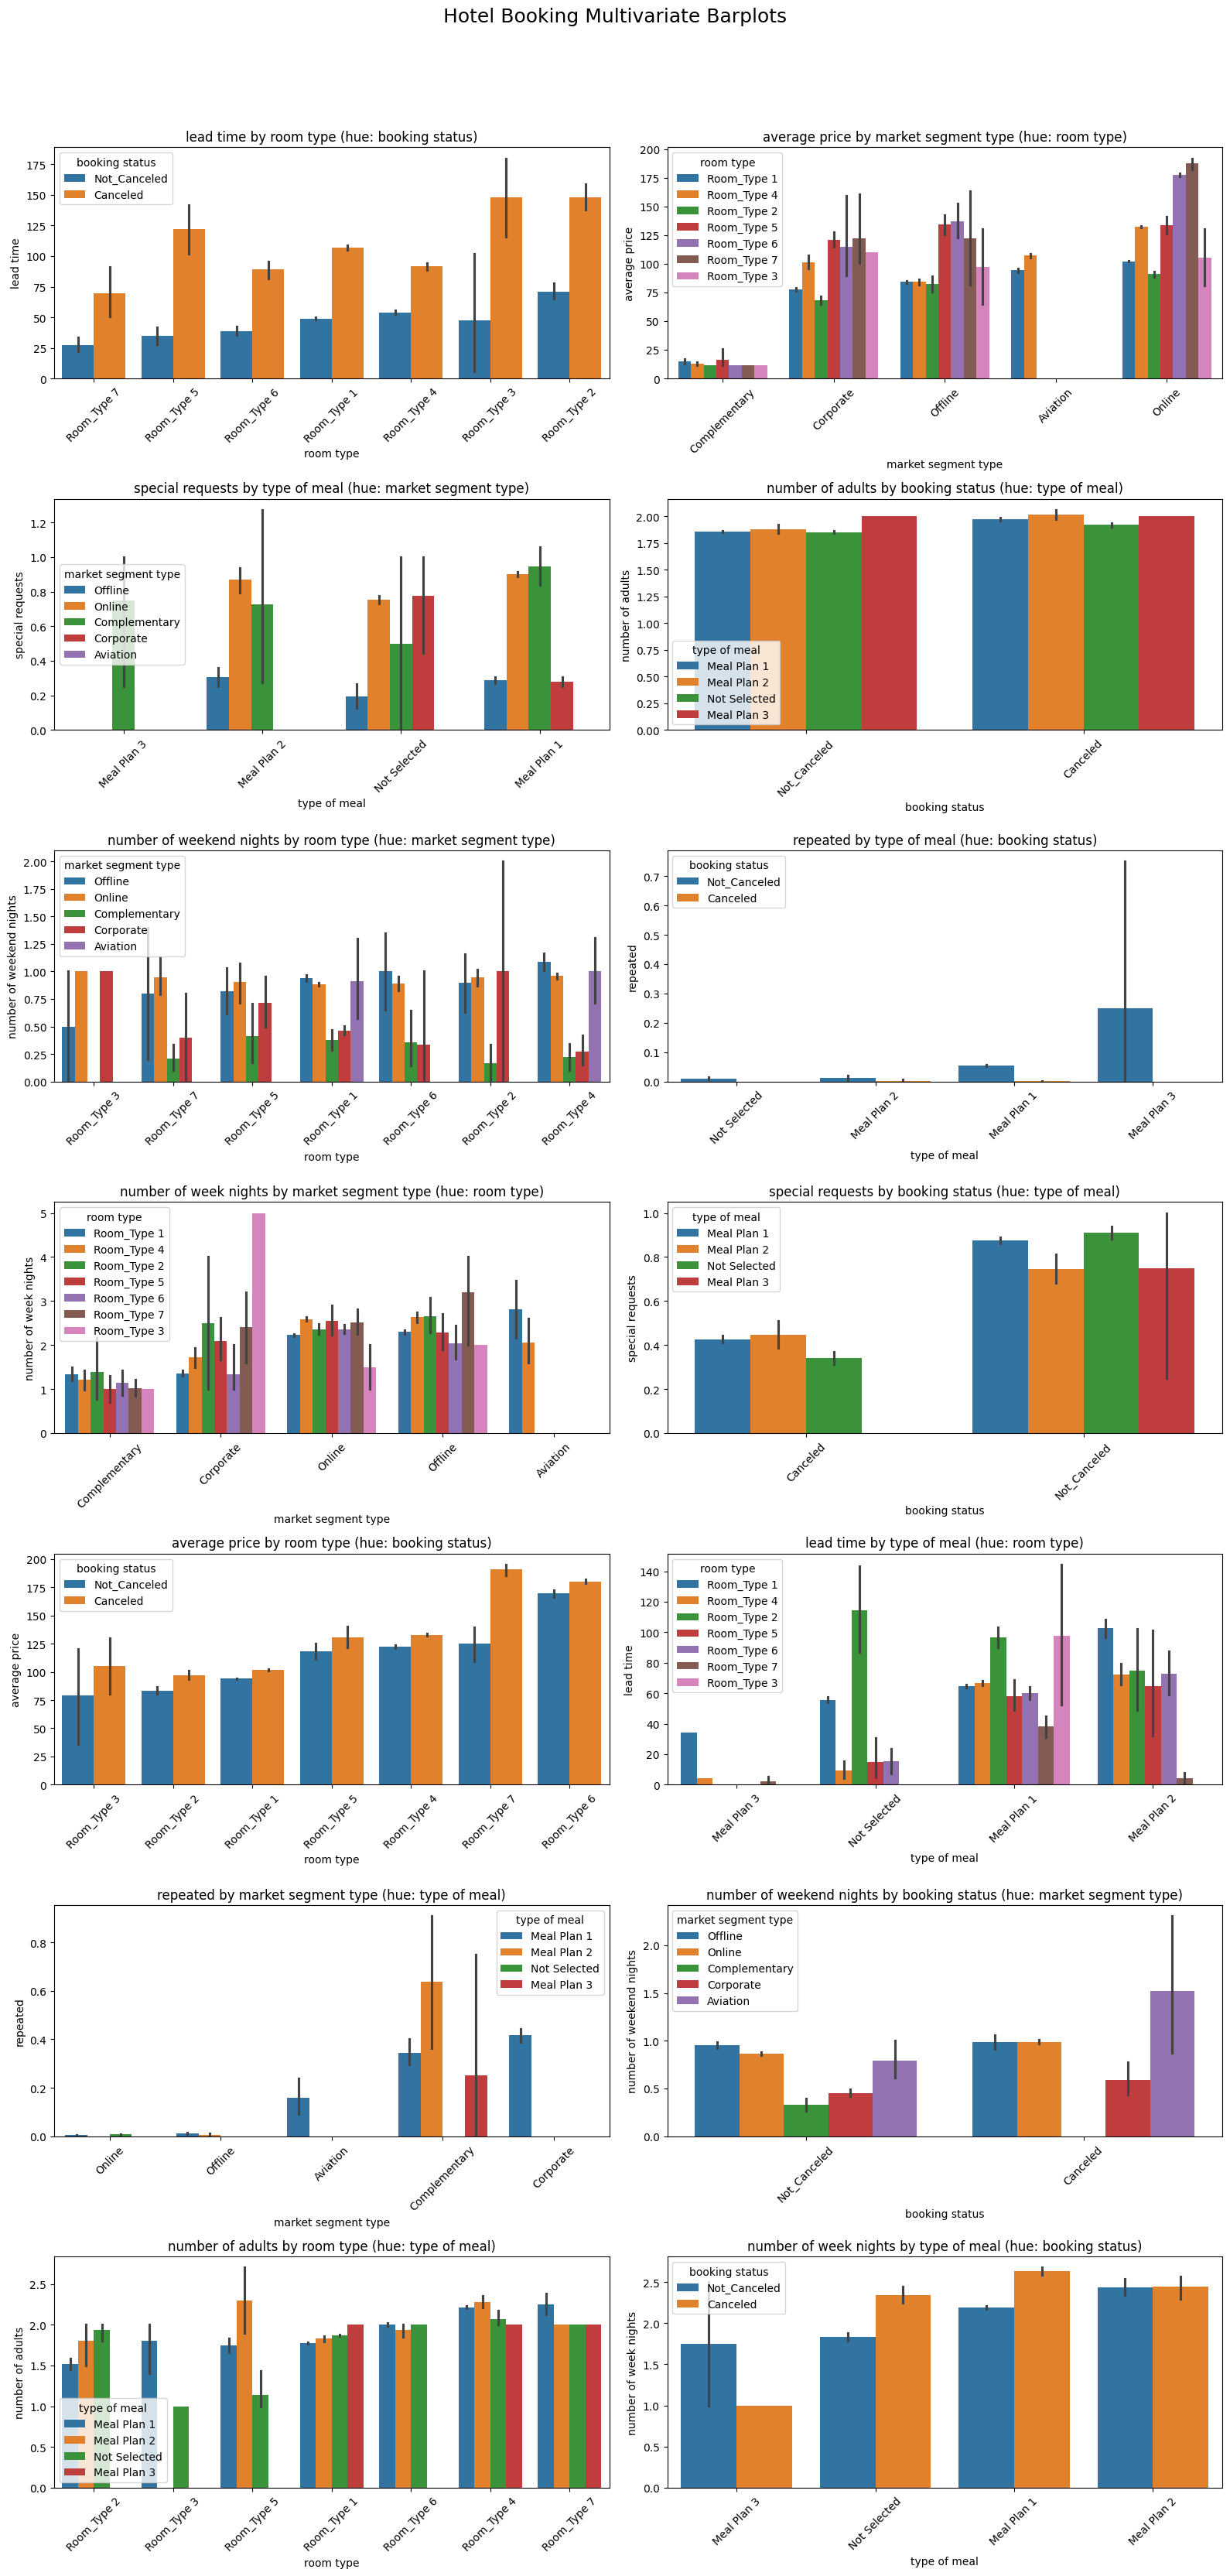

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define columns
numerical_columns = [
    'number of adults', 'number of weekend nights', 'number of week nights',
    'lead time', 'average price', 'special requests', 'repeated'
]

categorical_columns = ['type of meal', 'room type', 'market segment type', 'booking status']

# Curated combinations (x, y, hue) — no repeats per plot
plot_combinations = [
    ('room type', 'lead time', 'booking status'),
    ('market segment type', 'average price', 'room type'),
    ('type of meal', 'special requests', 'market segment type'),
    ('booking status', 'number of adults', 'type of meal'),
    ('room type', 'number of weekend nights', 'market segment type'),
    ('type of meal', 'repeated', 'booking status'),
    ('market segment type', 'number of week nights', 'room type'),
    ('booking status', 'special requests', 'type of meal'),
    ('room type', 'average price', 'booking status'),
    ('type of meal', 'lead time', 'room type'),
    ('market segment type', 'repeated', 'type of meal'),
    ('booking status', 'number of weekend nights', 'market segment type'),
    ('room type', 'number of adults', 'type of meal'),
    ('type of meal', 'number of week nights', 'booking status')
]

# Plotting
rows = (len(plot_combinations) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, 5 * rows))
fig.suptitle("Hotel Booking Multivariate Barplots", fontsize=18)
axes = axes.flatten()

for i, (x, y, hue) in enumerate(plot_combinations):
    ax = axes[i]

    # Sort x-axis by mean of y
    sort_order = df.groupby(x)[y].mean().sort_values().index

    sns.barplot(data=df, x=x, y=y, hue=hue, order=sort_order, ax=ax)
    ax.set_title(f"{y} by {x} (hue: {hue})")
    ax.tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




### Overall Key Takeaways from Multivariate Analysis:
#### Cancellation Risk Factors:

##### Longer Lead Times: This is consistently the strongest predictor of cancellation. Bookings made far in advance are highly susceptible to being canceled.

##### Higher Average Price: More expensive bookings also show a higher cancellation rate.

##### More Special Requests: Bookings with specific demands are more likely to be canceled, possibly due to unmet expectations or greater flexibility in guest plans.

##### Longer Stays (Weekend & Week Nights): There's a consistent trend for canceled bookings to have slightly longer planned stays.

##### Premium Offerings: "Meal Plan 2," "Room Type 2," and "Room Type 4" are consistently associated with higher prices, longer lead times, and more special requests, suggesting they are premium offerings attracting a specific type of traveler.

##### Budget/Last-Minute: "Meal Plan 3" stands out as the choice for last-minute, shorter, and lower-priced bookings.

##### Market Segment Behavior: "Online" and "Offline" segments are primarily leisure-focused, characterized by longer stays, higher prices, and more special requests. "Corporate" and "Aviation" segments have distinct, often shorter-term or discounted, booking patterns.

##### Loyalty: Repeat rates are generally low, but slightly higher for "Meal Plan 1" and "Meal Plan 2" (for not-canceled bookings) and for "Complementary" and "Aviation" market segments.

##### These multivariate insights provide a more nuanced understanding of customer behavior and booking patterns, which can be invaluable for revenue management, marketing, and operational planning. For example, the strong link between long lead times and cancellations suggests a need for targeted re-engagement strategies or more flexible cancellation policies for such bookings.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25974 entries, 0 to 7531
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          25974 non-null  int64         
 1   number of children        25974 non-null  int64         
 2   number of weekend nights  25974 non-null  int64         
 3   number of week nights     25974 non-null  int64         
 4   type of meal              25974 non-null  object        
 5   car parking space         25974 non-null  int64         
 6   room type                 25974 non-null  object        
 7   lead time                 25974 non-null  int64         
 8   market segment type       25974 non-null  object        
 9   repeated                  25974 non-null  int64         
 10  P-C                       25974 non-null  int64         
 11  P-not-C                   25974 non-null  int64         
 12  average price      

In [43]:
# Standardise column names (snake_case)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [44]:
df.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,date_of_reservation,booking_status,month_of_reservation,day_of_week,reservation_month,reservation_weekday
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,2015-10-02,Not_Canceled,Oct,Friday,10,4
5,1,0,0,2,Meal Plan 2,0,Room_Type 1,232,Offline,0,0,0,100.0,1,2016-09-13,Canceled,Sep,Tuesday,9,1
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,2017-05-20,Canceled,May,Saturday,5,5
556,1,0,0,2,Meal Plan 2,0,Room_Type 1,232,Offline,0,0,0,80.0,0,2017-07-01,Not_Canceled,Jul,Saturday,7,5
656,2,0,0,2,Meal Plan 2,0,Room_Type 1,232,Online,0,0,0,101.5,0,2017-07-01,Canceled,Jul,Saturday,7,5


In [45]:
df['total_nights'] = df['number_of_week_nights'] + df['number_of_weekend_nights']

In [46]:
df.drop(["reservation_month", 'reservation_weekday', 'date_of_reservation', 'number_of_weekend_nights', 'number_of_week_nights' ], axis=1, inplace=True)

In [47]:
df.head()

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,booking_status,month_of_reservation,day_of_week,total_nights
0,1,1,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,Not_Canceled,Oct,Friday,7
5,1,0,Meal Plan 2,0,Room_Type 1,232,Offline,0,0,0,100.0,1,Canceled,Sep,Tuesday,2
3,1,0,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,Canceled,May,Saturday,2
556,1,0,Meal Plan 2,0,Room_Type 1,232,Offline,0,0,0,80.0,0,Not_Canceled,Jul,Saturday,2
656,2,0,Meal Plan 2,0,Room_Type 1,232,Online,0,0,0,101.5,0,Canceled,Jul,Saturday,2


### Encode Categorical Variables

In [48]:
# For model building (later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
# 2. Encode Categorical Variables

# Booking status → binary (Target Variable)
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# Label encode ordinal-like features
le = LabelEncoder()
df['type_of_meal'] = le.fit_transform(df['type_of_meal'])
df['room_type'] = le.fit_transform(df['room_type'])
df['market_segment_type'] = le.fit_transform(df['market_segment_type'])
df['month_of_reservation']  = le.fit_transform(df['month_of_reservation'])
df['day_of_week']  = le.fit_transform(df['day_of_week'])

In [50]:
# 3. Feature selection (X) and target (y)


# Define features (X) and target variable (y)
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [51]:
df.head()

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,booking_status,month_of_reservation,day_of_week,total_nights
0,1,1,0,0,0,224,3,0,0,0,88.0,0,0,10,0,7
5,1,0,1,0,0,232,3,0,0,0,100.0,1,1,11,5,2
3,1,0,0,0,0,211,4,0,0,0,100.0,1,1,8,2,2
556,1,0,1,0,0,232,3,0,0,0,80.0,0,0,5,2,2
656,2,0,1,0,0,232,4,0,0,0,101.5,0,1,5,2,2


## Scaling Variables using Standard Scaler

IndexError: index 12 is out of bounds for axis 0 with size 12

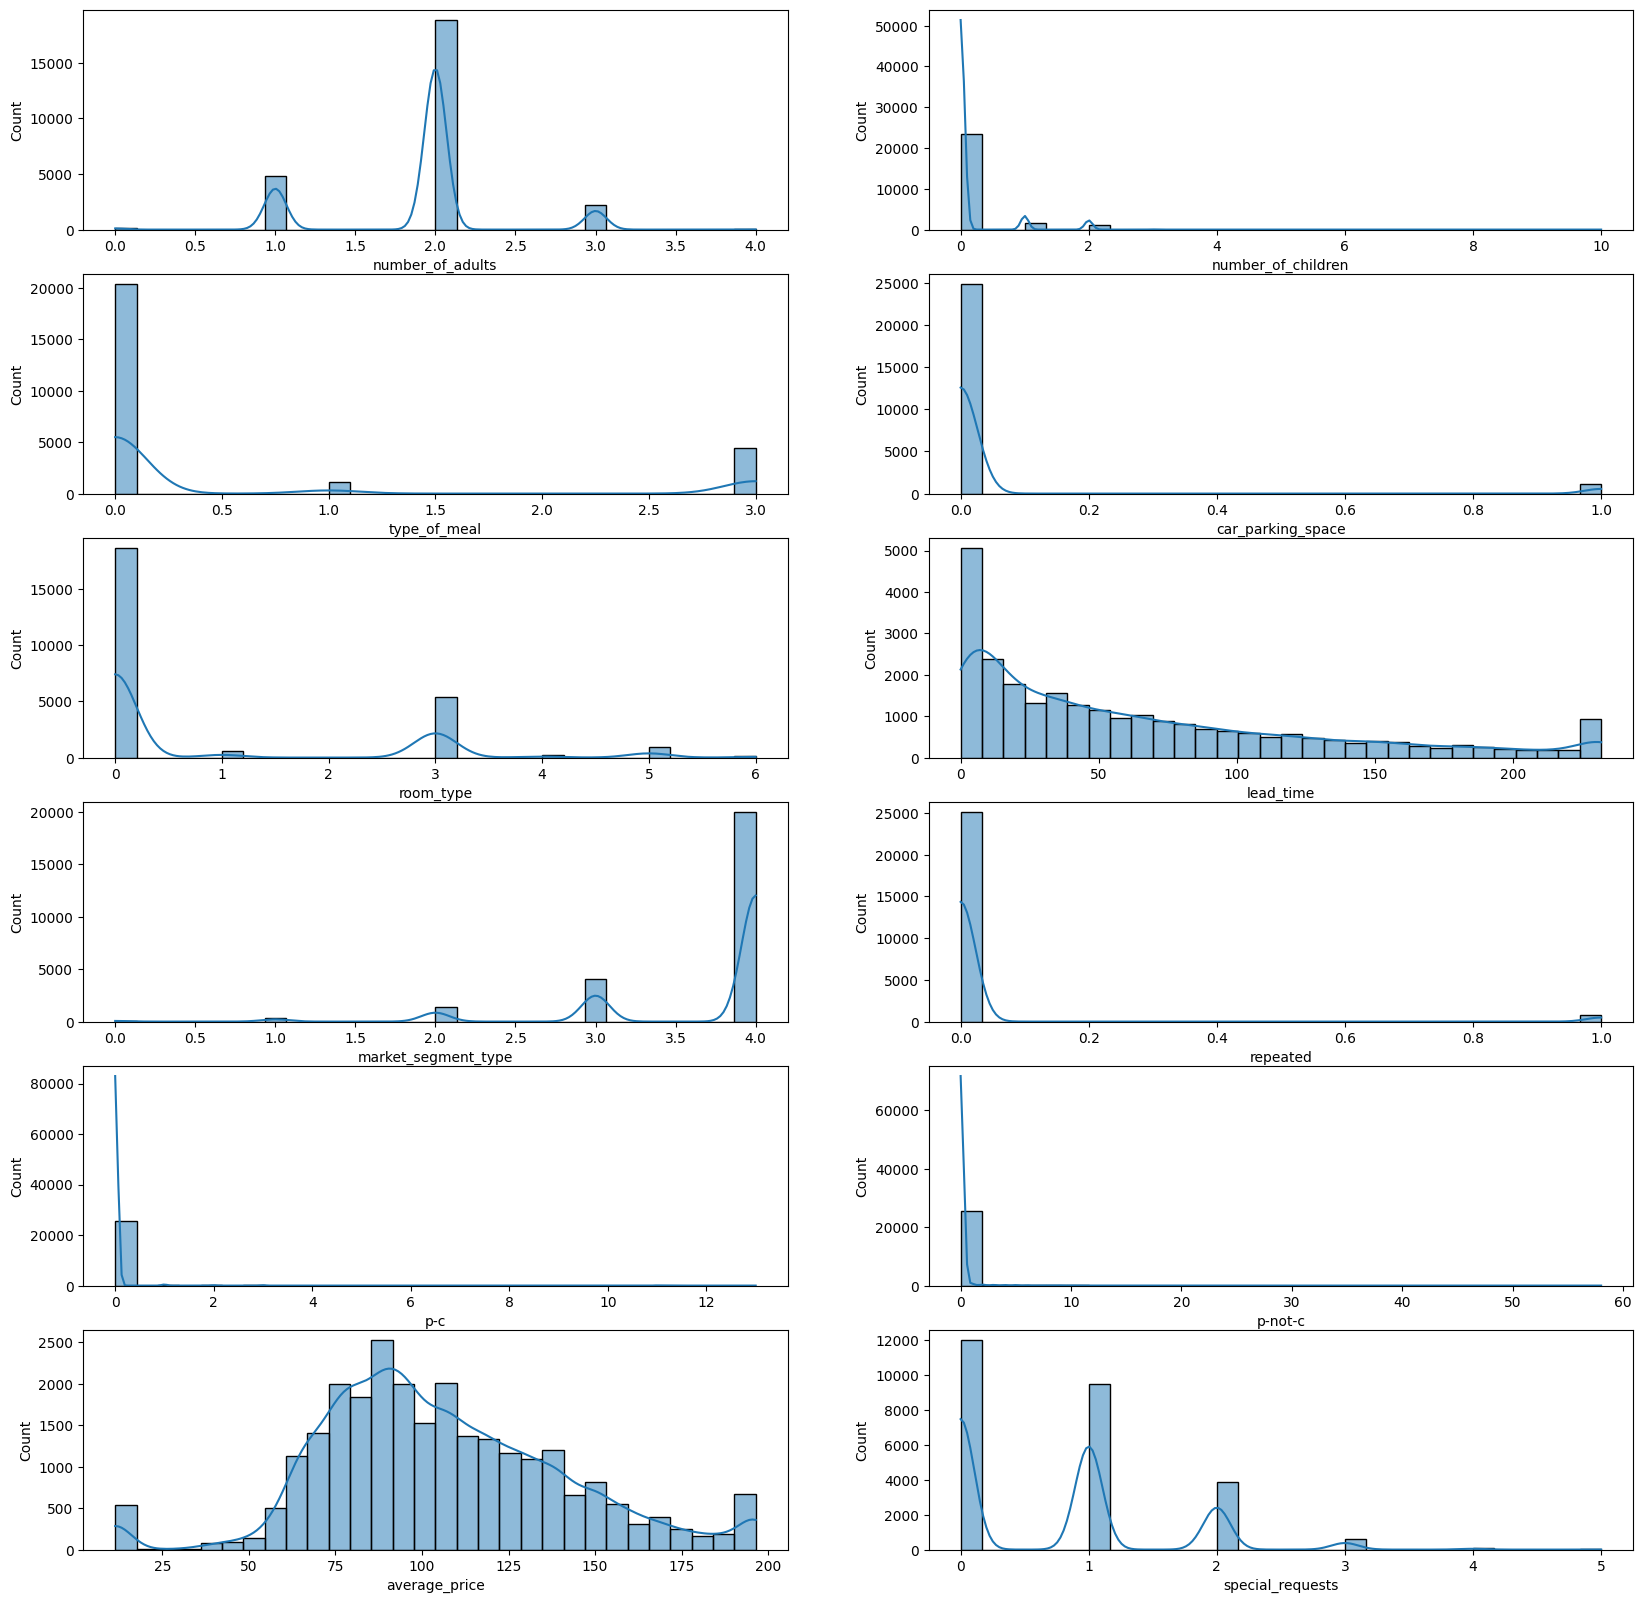

In [52]:
# Display plots, to determine the skewness/uniformity of data(variables).

fig, ax = plt.subplots (6,2, figsize=(20,20))
ax = ax.flatten()

for idx, col in enumerate(df):
    sns.histplot(df[col], kde=True, bins=30, ax=ax[idx])

plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [54]:
# Scale numerical columns
scaler = StandardScaler()
scaled_cols = [
    'number_of_adults', 'number_of_children', 'total_nights','lead_time', 'type_of_meal',
    'room_type', 'market_segment_type', 'p-c', 'p-not-c', 'average_price', 'special_requests',
    'month_of_reservation', 'day_of_week'
]
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [55]:
df.head()

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,booking_status,month_of_reservation,day_of_week,total_nights
0,-1.684018,1.856752,-0.494968,0,-0.58806,2.478815,-1.003432,0,-0.069745,-0.102785,-0.489641,-0.910804,0,1.117623,-1.539990,2.003587
5,-1.684018,-0.305518,0.389599,0,-0.58806,2.603571,-1.003432,0,-0.069745,-0.102785,-0.151791,0.315912,1,1.385828,0.965723,-0.594574
3,-1.684018,-0.305518,-0.494968,0,-0.58806,2.276086,0.478523,0,-0.069745,-0.102785,-0.151791,0.315912,1,0.581213,-0.537705,-0.594574
556,-1.684018,-0.305518,0.389599,0,-0.58806,2.603571,-1.003432,0,-0.069745,-0.102785,-0.714875,-0.910804,0,-0.223401,-0.537705,-0.594574
656,0.207553,-0.305518,0.389599,0,-0.58806,2.603571,0.478523,0,-0.069745,-0.102785,-0.109559,-0.910804,1,-0.223401,-0.537705,-0.594574


In [56]:
# Check Class Distribution
df['booking_status'].value_counts()

0    18535
1     7439
Name: booking_status, dtype: int64

In [57]:
df['booking_status'].value_counts(normalize=True)*100

0    71.359821
1    28.640179
Name: booking_status, dtype: float64

## Handling Class Imbalance using SMOTE

In [58]:
# pip install --upgrade imbalanced-learn
!pip install imbalanced-learn

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
# Separate features and target

X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [61]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [62]:
y_resampled.value_counts()

0    18535
1    18535
Name: booking_status, dtype: int64

In [63]:
y_resampled.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: booking_status, dtype: float64

<Axes: xlabel='booking_status', ylabel='count'>

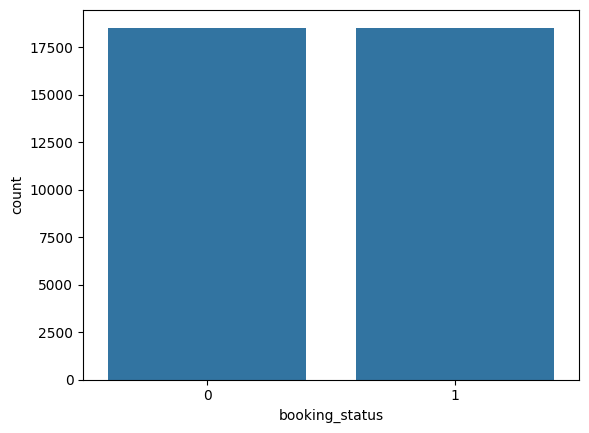

In [64]:
sns.countplot(x=y_resampled)

In [65]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)

In [66]:
resampled_data.head()

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,month_of_reservation,day_of_week,total_nights
0,-1.684018,1.856752,-0.494968,0,-0.58806,2.478815,-1.003432,0,-0.069745,-0.102785,-0.489641,-0.910804,1.117623,-1.539990,2.003587
1,-1.684018,-0.305518,0.389599,0,-0.58806,2.603571,-1.003432,0,-0.069745,-0.102785,-0.151791,0.315912,1.385828,0.965723,-0.594574
2,-1.684018,-0.305518,-0.494968,0,-0.58806,2.276086,0.478523,0,-0.069745,-0.102785,-0.151791,0.315912,0.581213,-0.537705,-0.594574
3,-1.684018,-0.305518,0.389599,0,-0.58806,2.603571,-1.003432,0,-0.069745,-0.102785,-0.714875,-0.910804,-0.223401,-0.537705,-0.594574
4,0.207553,-0.305518,0.389599,0,-0.58806,2.603571,0.478523,0,-0.069745,-0.102785,-0.109559,-0.910804,-0.223401,-0.537705,-0.594574


In [67]:
resampled_data = resampled_data.assign(booking_status=y_resampled)

In [68]:
resampled_data.head()

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p-c,p-not-c,average_price,special_requests,month_of_reservation,day_of_week,total_nights,booking_status
0,-1.684018,1.856752,-0.494968,0,-0.58806,2.478815,-1.003432,0,-0.069745,-0.102785,-0.489641,-0.910804,1.117623,-1.539990,2.003587,0
1,-1.684018,-0.305518,0.389599,0,-0.58806,2.603571,-1.003432,0,-0.069745,-0.102785,-0.151791,0.315912,1.385828,0.965723,-0.594574,1
2,-1.684018,-0.305518,-0.494968,0,-0.58806,2.276086,0.478523,0,-0.069745,-0.102785,-0.151791,0.315912,0.581213,-0.537705,-0.594574,1
3,-1.684018,-0.305518,0.389599,0,-0.58806,2.603571,-1.003432,0,-0.069745,-0.102785,-0.714875,-0.910804,-0.223401,-0.537705,-0.594574,0
4,0.207553,-0.305518,0.389599,0,-0.58806,2.603571,0.478523,0,-0.069745,-0.102785,-0.109559,-0.910804,-0.223401,-0.537705,-0.594574,1


In [69]:
# Save the cleaned dataset for future use
resampled_data.to_csv('booking_corrected.csv', index=False)

In [70]:
data = pd.read_csv('booking_corrected.csv')

In [71]:
data['booking_status'].value_counts()

0    18535
1    18535
Name: booking_status, dtype: int64

## Data Splitting

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled  # Stratify to maintain class proportions
)

In [74]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 29656
Testing set size: 7414


In [75]:
# Proportion of Train set distribution
y_train.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: booking_status, dtype: float64

In [76]:
# Proportion of Train set distribution
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: booking_status, dtype: float64

In [77]:
# Proportion of Test set distribution
y_test.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: booking_status, dtype: float64

## Model Selection

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # DecisionTree = MultipleRandomForest

# Another model that needs to be installed different from sklearn
!pip install xgboost
from xgboost import XGBClassifier

In [79]:
# Train logistic regression model initialization
logreg = LogisticRegression(random_state=42)
# Train logistic regression model
# logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
# Predict on the test set
y_pred = logreg.predict(X_test)

report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Evaluate performance
print("Logistic Regression Classification Report:\n")
print(report)

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3707
           1       0.77      0.78      0.77      3707

    accuracy                           0.77      7414
   macro avg       0.77      0.77      0.77      7414
weighted avg       0.77      0.77      0.77      7414



In [80]:
# Initiate random forest model
# rf_model = RandomForestClassifier(class_weight={0:1, 1:3}, random_state=42, n_estimators=100)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
# Train random forest model
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
# Evaluate performance
print("Random Forest Classification Report:\n")
print(report)

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3707
           1       0.89      0.89      0.89      3707

    accuracy                           0.89      7414
   macro avg       0.89      0.89      0.89      7414
weighted avg       0.89      0.89      0.89      7414



In [81]:
# Define the models
# class_weights={0:1, 1:3}
class_weights='balanced'
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight=class_weights),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=class_weights),
    'Support Vector Machine': SVC(random_state=42, class_weight=class_weights),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight=class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm="SAMME"),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3707
           1       0.77      0.78      0.77      3707

    accuracy                           0.77      7414
   macro avg       0.77      0.77      0.77      7414
weighted avg       0.77      0.77      0.77      7414



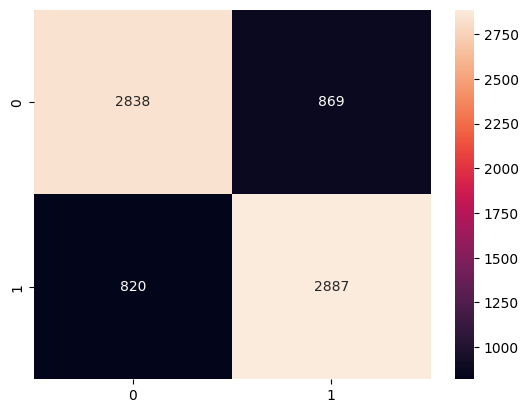

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3707
           1       0.89      0.89      0.89      3707

    accuracy                           0.89      7414
   macro avg       0.89      0.89      0.89      7414
weighted avg       0.89      0.89      0.89      7414



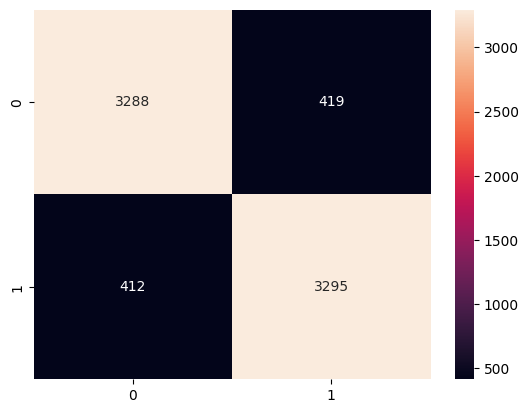

Training Support Vector Machine...
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3707
           1       0.80      0.79      0.80      3707

    accuracy                           0.80      7414
   macro avg       0.80      0.80      0.80      7414
weighted avg       0.80      0.80      0.80      7414



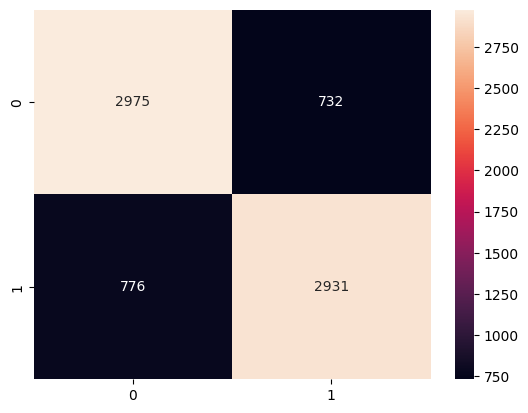

Training k-Nearest Neighbors...
k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      3707
           1       0.78      0.90      0.84      3707

    accuracy                           0.83      7414
   macro avg       0.83      0.83      0.82      7414
weighted avg       0.83      0.83      0.82      7414



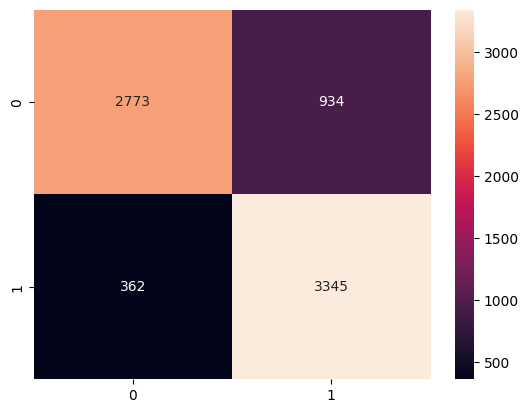

Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3707
           1       0.83      0.84      0.84      3707

    accuracy                           0.84      7414
   macro avg       0.84      0.84      0.84      7414
weighted avg       0.84      0.84      0.84      7414



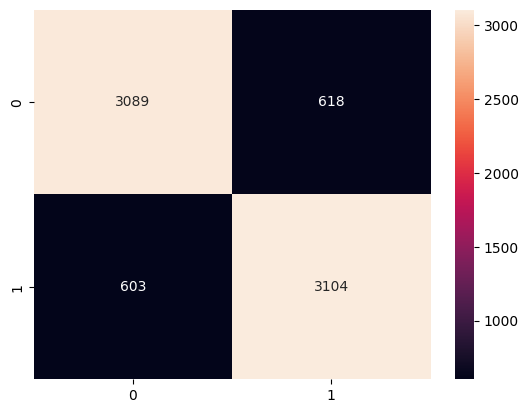

Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3707
           1       0.86      0.82      0.84      3707

    accuracy                           0.85      7414
   macro avg       0.85      0.85      0.85      7414
weighted avg       0.85      0.85      0.85      7414



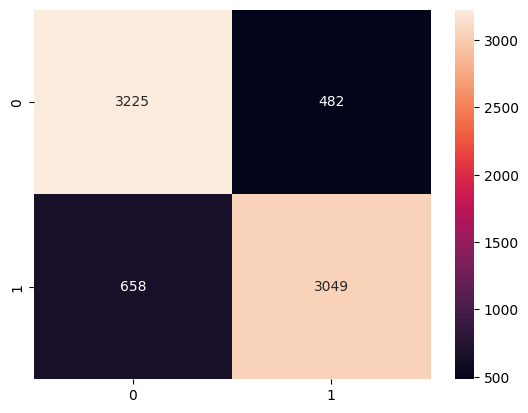

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3707
           1       0.81      0.77      0.79      3707

    accuracy                           0.79      7414
   macro avg       0.79      0.79      0.79      7414
weighted avg       0.79      0.79      0.79      7414



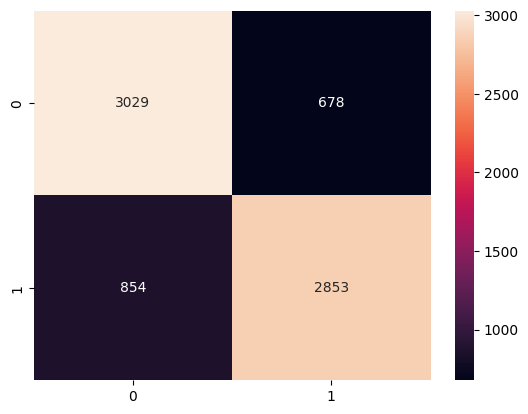

Training XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3707
           1       0.89      0.88      0.89      3707

    accuracy                           0.89      7414
   macro avg       0.89      0.89      0.89      7414
weighted avg       0.89      0.89      0.89      7414



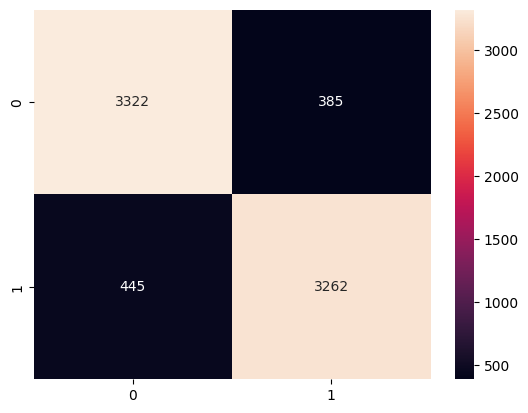

In [82]:
from sklearn.metrics import classification_report, accuracy_score

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }
    # print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}")

    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

## Conclusion
Based on all the models above, RandomForest Classification and XGBoost have the highest accuracy. So we may fine tune both for better optimization and performance.
But I will stick to RandomForest Classification for the finetunning task at the moment

## Feature Importances

In [83]:
models

{'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Support Vector Machine': SVC(class_weight='balanced', random_state=42),
 'k-Nearest Neighbors': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
      

In [84]:
# Assuming your feature set is in X and feature names are in X.columns
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    feat_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_df)
    plt.title(f'{model_name} Feature Importance')
    plt.tight_layout()
    plt.show()

    return feat_df


### Feature Importance for Random Forest

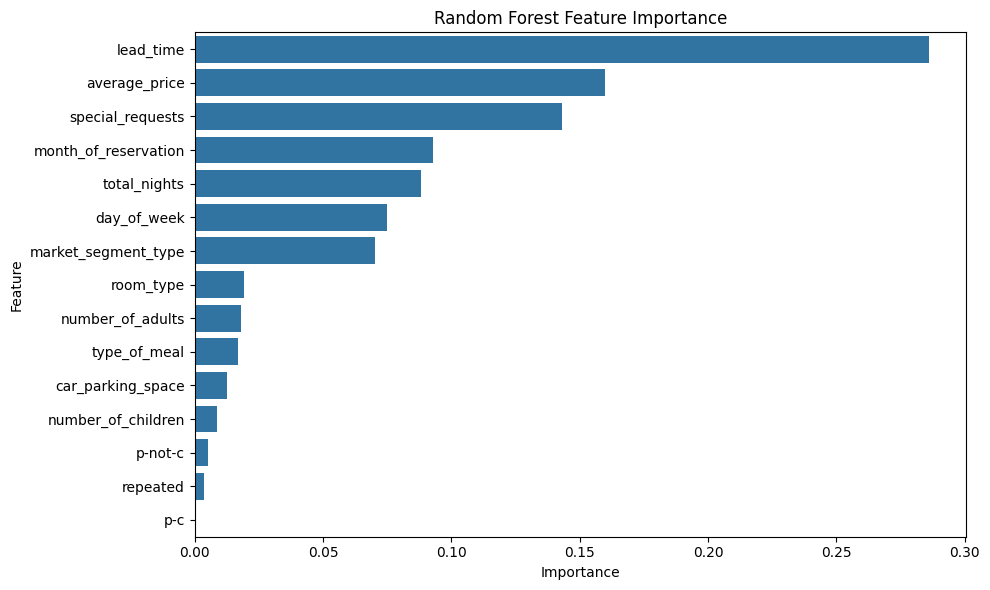

,Feature,Importance
5,lead_time,0.286098
10,average_price,0.160038
11,special_requests,0.143099
12,month_of_reservation,0.092735
14,total_nights,0.088031
13,day_of_week,0.074805
6,market_segment_type,0.070188
4,room_type,0.019238
0,number_of_adults,0.018191
2,type_of_meal,0.016969


In [85]:

rf_model = models['Random Forest']
plot_feature_importance(rf_model, "Random Forest")



### Feature Importance for XGBoost

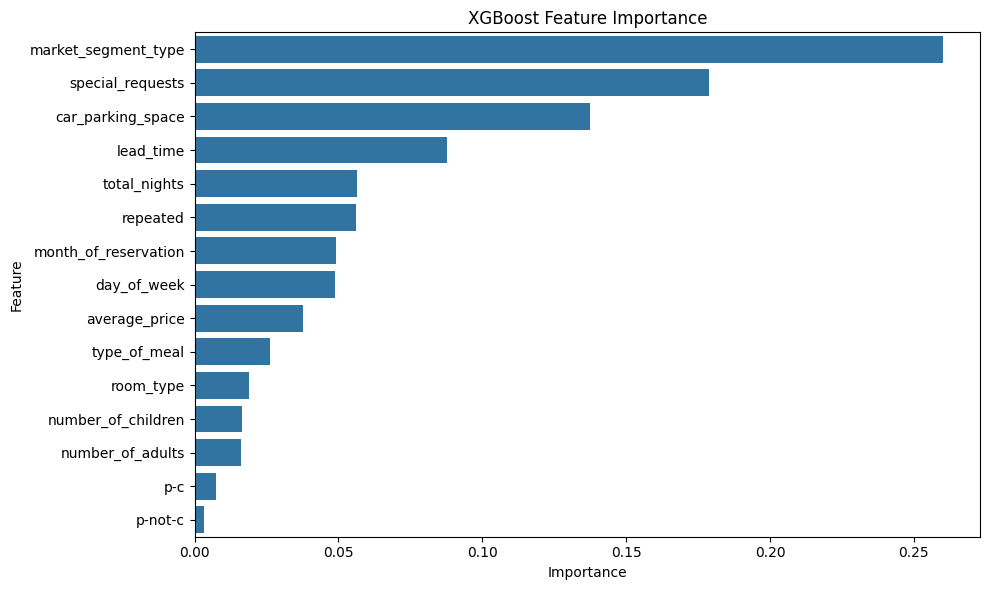

,Feature,Importance
6,market_segment_type,0.259990
11,special_requests,0.178909
3,car_parking_space,0.137292
5,lead_time,0.087733
14,total_nights,0.056546
7,repeated,0.055991
12,month_of_reservation,0.048965
13,day_of_week,0.048936
10,average_price,0.037550
2,type_of_meal,0.026077


In [86]:

xgb_model = models['XGBoost']
plot_feature_importance(xgb_model, "XGBoost")

Random Forest (Top 5 Features)
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3707
           1       0.86      0.86      0.86      3707

    accuracy                           0.86      7414
   macro avg       0.86      0.86      0.86      7414
weighted avg       0.86      0.86      0.86      7414



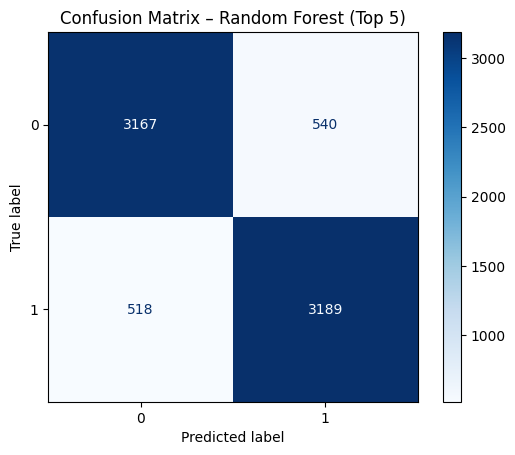

XGBoost (Top 5 Features)
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3707
           1       0.85      0.82      0.83      3707

    accuracy                           0.84      7414
   macro avg       0.84      0.84      0.84      7414
weighted avg       0.84      0.84      0.84      7414



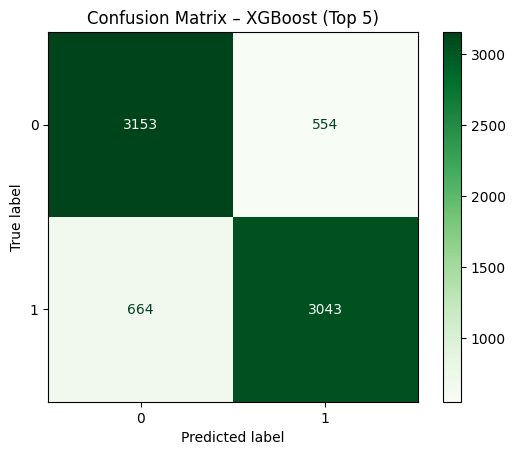

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get top 5 features for Random Forest
rf_model = models['Random Forest']
rf_feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

rf_top5_features = rf_feat_df['Feature'].head(5).tolist()

# Step 2: Get top 5 features for XGBoost
xgb_model = models['XGBoost']
xgb_feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

xgb_top5_features = xgb_feat_df['Feature'].head(5).tolist()

# Step 3: Prepare reduced datasets
X_train_rf_top5 = X_train[rf_top5_features]
X_test_rf_top5 = X_test[rf_top5_features]

X_train_xgb_top5 = X_train[xgb_top5_features]
X_test_xgb_top5 = X_test[xgb_top5_features]

# Step 4: Retrain Random Forest
rf_top5 = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_top5.fit(X_train_rf_top5, y_train)
y_pred_rf = rf_top5.predict(X_test_rf_top5)

print("Random Forest (Top 5 Features)")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf_top5, X_test_rf_top5, y_test, cmap='Blues')
plt.title("Confusion Matrix – Random Forest (Top 5)")
plt.show()

# Step 5: Retrain XGBoost
xgb_top5 = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_top5.fit(X_train_xgb_top5, y_train)
y_pred_xgb = xgb_top5.predict(X_test_xgb_top5)

print("XGBoost (Top 5 Features)")
print(classification_report(y_test, y_pred_xgb))
ConfusionMatrixDisplay.from_estimator(xgb_top5, X_test_xgb_top5, y_test, cmap='Greens')
plt.title("Confusion Matrix – XGBoost (Top 5)")
plt.show()


## Hyperparameter Tunning for Random Forest Model

We’ll use grid search to optimize hyperparameters for the Random Forest model.

In [88]:
from sklearn.model_selection import GridSearchCV   # To cross validate

In [89]:
# Define parameter grid
parameter_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [90]:
grid_search_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid = parameter_grid, cv=5, scoring='f1', n_jobs=-1
)

In [91]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [92]:
# Best parameters
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [93]:
# Train best model
best_rf = grid_search_rf.best_estimator_

In [94]:
# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

In [95]:
# Evaluate performance
print("Tuned Random Forest Classification Report:\n")
report = classification_report(y_test, y_pred_best_rf)
print(report)

Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3707
           1       0.89      0.89      0.89      3707

    accuracy                           0.89      7414
   macro avg       0.89      0.89      0.89      7414
weighted avg       0.89      0.89      0.89      7414



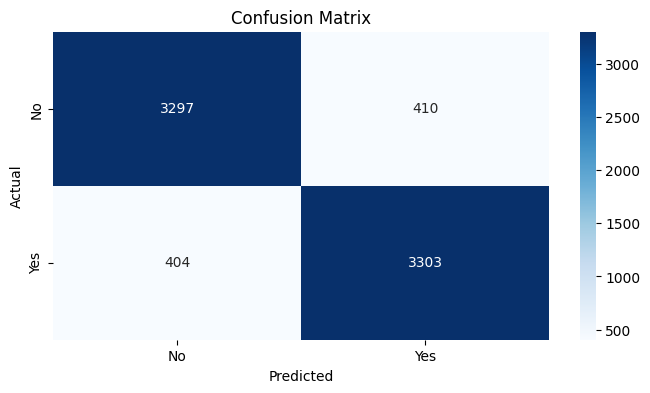

In [96]:
from sklearn.metrics import confusion_matrix

conf_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve and AUC Score for Random Forest

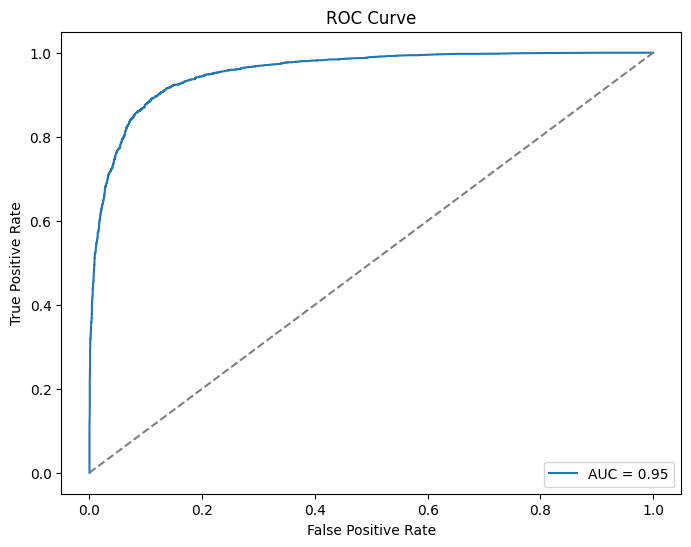

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities for ROC
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)     # fpr = first positive rate, tpr= true positive rate

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tunning for XGBoost

We’ll use grid search to optimize hyperparameters for XGBoost Model

In [98]:
grid_search_xgb = GridSearchCV(
    XGBClassifier(class_weight='balanced', eval_metric='mlogloss'),
    param_grid = parameter_grid, cv=5, scoring='f1', n_jobs=-1
)

In [99]:
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=No...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [100]:
# Best parameters
print(f"Best Hyperparameters: {grid_search_xgb.best_params_}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [101]:
# Train best model
best_xgb = grid_search_xgb.best_estimator_

In [102]:
# Predict on the test set
y_pred_best_xgb = best_xgb.predict(X_test)

In [103]:
# Evaluate performance
print("Tuned XGBoost Classification Report:\n")
report = classification_report(y_test, y_pred_best_xgb)
print(report)

Tuned XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3707
           1       0.89      0.89      0.89      3707

    accuracy                           0.89      7414
   macro avg       0.89      0.89      0.89      7414
weighted avg       0.89      0.89      0.89      7414



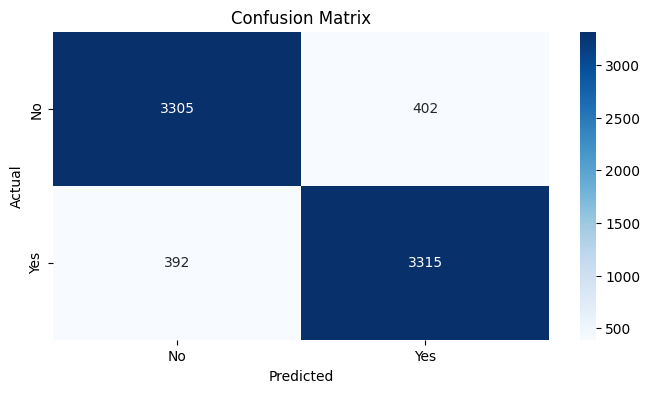

In [104]:
from sklearn.metrics import confusion_matrix

conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve and AUC Score for XGBoost

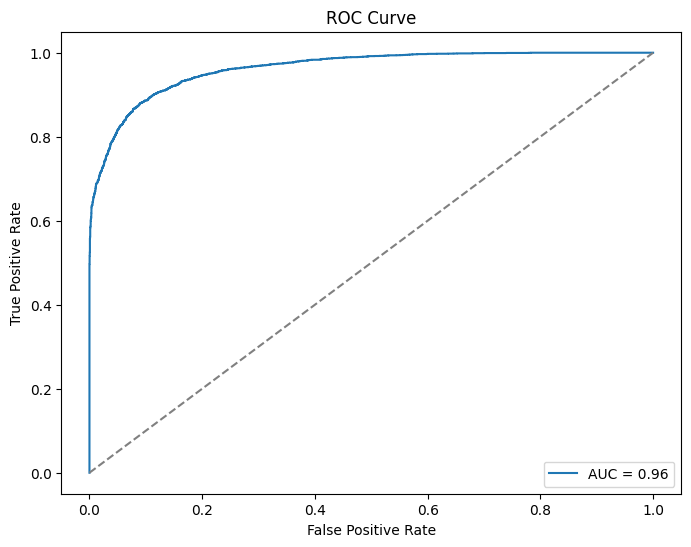

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities for ROC
y_probs = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)     # fpr = first positive rate, tpr= true positive rate

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Modelling Steps and Conclusion

I started our modelling by encoding categorical data: type of meal, room type, market segment type, month of reservation and day of the week using label encoder

Then I scaled our numerical data using standard scaler

I separated our data into feature and target (booking_status)

Handled class imbalance using SMOTE technique

Spllitted our dataset into the training and testing segments

I then trained our model using  Logistic Regression, Random Forest, Support Vector Machine, KNeighborsClassifier, DecisionTreeClassifier, GradientBoostingClassifier, AdaBoostClassifier, XGBClassifier


After evaluating all the models using accuracy score, classification report and confusion matrix.

XGBoost Classifier and Random Forest Tree Classification were the most accurate with 89%

I then proceeded to improve my accuracy with limiting the features to the top 5 features to block out the noise in our models, however Random Forest accuracy dropped to 86% from 89%, and XGBoost accuracy dropped to 84% from 89%

I therefore proceeded to improve our models using hyperparameter tuning using GridSearchCV since the feature importance method was not effective

Result: Random Forest 89% accuracy with AUC score of 0.95
XGBoost 89% with AUC score of 0.96

Conclusion: XGBoost is the most accurate based on my model.
However there is room for improvement by:
1.	Using different Encoder
2.	Using different Scaler on our dataset. 
3.	Tweek the dataset my correcting more numerical data outliers
4.	Use a modal date instead of dropping the leap year date in our date of reservation column
